## **ARIMAX MODEL**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import t
from statsmodels.tsa.stattools import adfuller
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from PythonTsa.plot_acf_pacf import acf_pacf_fig

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_hs04 = pd.read_csv('HS04.csv')
start_date = "2006-01-01"
end_date = "2024-02-28"
date_range = pd.date_range(start=start_date, end=end_date, freq="M")
print(df_hs04)

    Tanggal  ImporHS04Ton  Eks_IdulFitri  Eks_IdulAdha  Eks_Imlek  Eks_Natal  \
0     6-Jan         22321              0             0          1          1   
1     6-Feb         22988              0             0          1          0   
2     6-Mar         18043              0             0          0          0   
3     6-Apr         21278              0             0          0          0   
4     6-May         20163              0             0          0          0   
..      ...           ...            ...           ...        ...        ...   
213  23-Oct         32940              0             0          0          0   
214  23-Nov         39418              0             0          0          1   
215  23-Dec         37017              0             0          0          1   
216  24-Jan         45576              0             0          1          1   
217  24-Feb         32046              0             0          1          0   

     Inflasi(%)  USDtoRP  
0         17

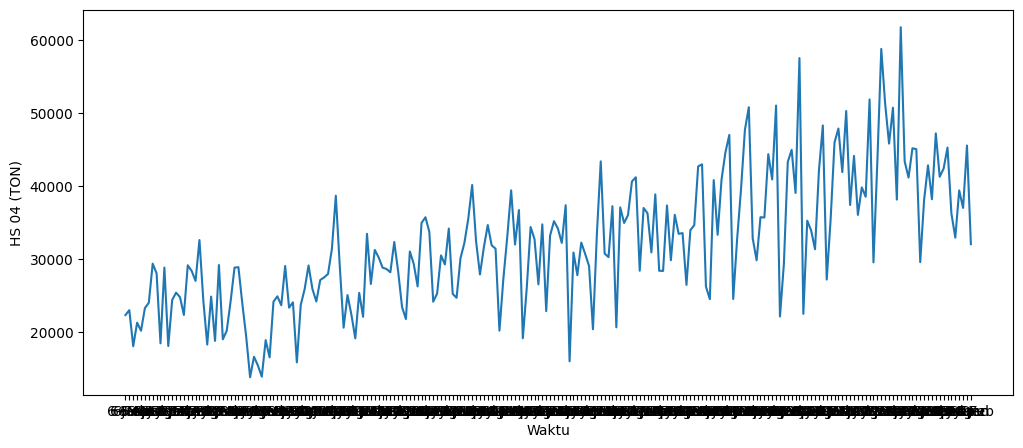

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_hs04.Tanggal, df_hs04.ImporHS04Ton)
plt.xlabel('Waktu'), plt.ylabel('HS 04 (TON)')
plt.show()

In [ ]:
train_size = int(len(df_hs04) * 0.85)
train_data = df_hs04.iloc[:train_size]
test_data = df_hs04.iloc[train_size:]

In [ ]:
len(train_data)

185

In [ ]:
len(test_data)

33

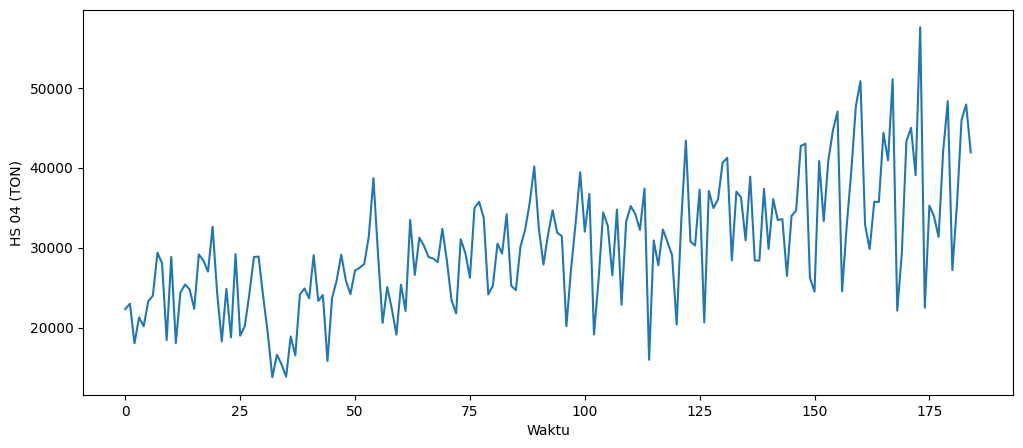

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(train_data.ImporHS04Ton)
plt.xlabel('Waktu'), plt.ylabel('HS 04 (TON)')
plt.show()

<Figure size 1000x800 with 0 Axes>

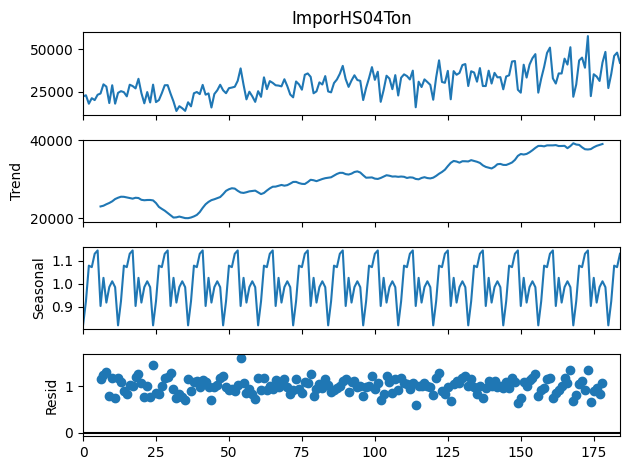

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(train_data['ImporHS04Ton'], model='multiplicative', period=12)
plt.figure(figsize=(10,8), facecolor='white')
result_mul.plot()
plt.show()

<Figure size 1000x800 with 0 Axes>

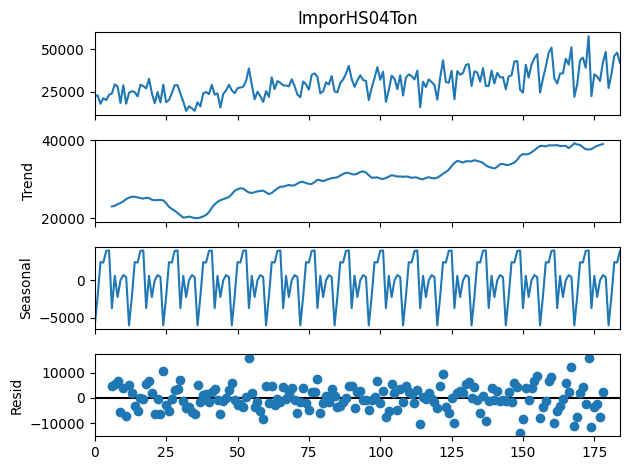

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(train_data['ImporHS04Ton'], model='additive', period=12)
plt.figure(figsize=(10,8), facecolor='white')
result_mul.plot()
plt.show()

In [ ]:
adf = adfuller(train_data['ImporHS04Ton'],autolag='AIC')[1]
print(adf)

0.9051122522155208


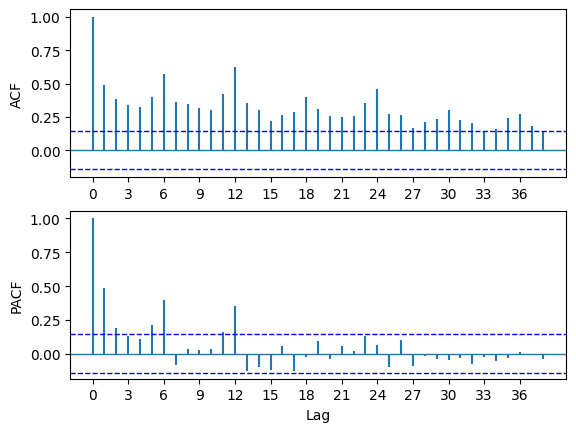

In [ ]:
acf_pacf_fig(train_data.ImporHS04Ton,both=True,lag=38);plt.show()

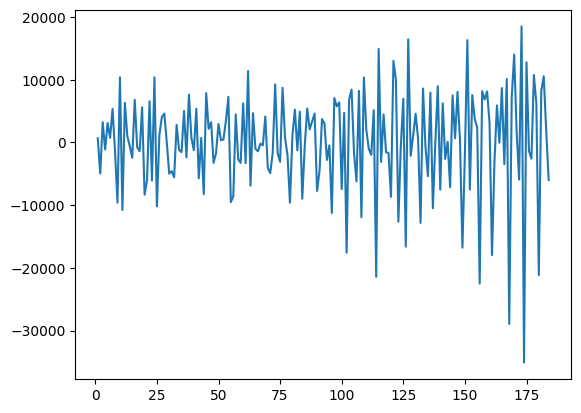

In [ ]:
diff = train_data['ImporHS04Ton'].diff().dropna()
plt.plot(diff)

In [ ]:
adf_diff = adfuller(diff,autolag='AIC')[1]
print(adf_diff)

8.688820621008473e-10


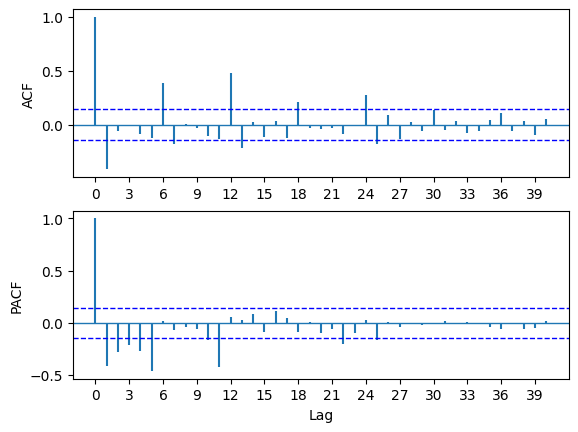

In [ ]:
acf_pacf_fig(diff,both=True,lag=40)
plt.show()

In [ ]:
#Auto_Arima dengan p,d,q ditentukan sendiri
from pmdarima import auto_arima
import pandas as pd

exog_vars = train_data[['Eks_IdulFitri', 'Eks_IdulAdha', 'Eks_Imlek', 'Eks_Natal', 'Inflasi(%)','USDtoRP']]
model = auto_arima(train_data['ImporHS04Ton'], exogenous=exog_vars,
                   start_p=0, start_q=0, max_p=5, max_q=1, max_d=2,
                   seasonal=False, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3836.074, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3805.232, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3834.108, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3792.124, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3786.494, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3774.712, Time=0.11 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3734.924, Time=0.14 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=3736.796, Time=0.64 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3751.573, Time=0.18 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=3734.413, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=3773.319, Time=0.08 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=3736.191, Time=0.43 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=3750.564, Time=0.18 sec

Best model:  ARIMA(5,1,0)(0,0,0)[0]  

In [ ]:
#Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek', 'Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(5,1,0))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:           ImporHS04Ton   No. Observations:                  185
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -1865.572
Date:                Sun, 05 May 2024   AIC                           3747.143
Time:                        11:52:07   BIC                           3772.863
Sample:                             0   HQIC                          3757.567
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3218.7783    930.094     -3.461      0.001   -5041.729   -1395.827
Inflasi(%)   915.5784    272.114      3.365      0.001     382.246    1448.911
ar.L1         -0.7096      0.070    -10.069      0.0

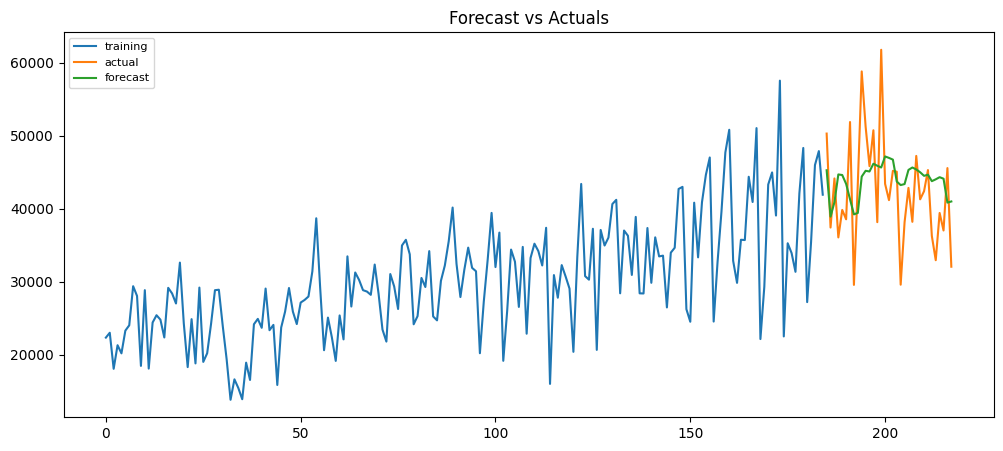

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek', 'Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7125.235092532251
MAPE:  14.661481565615214


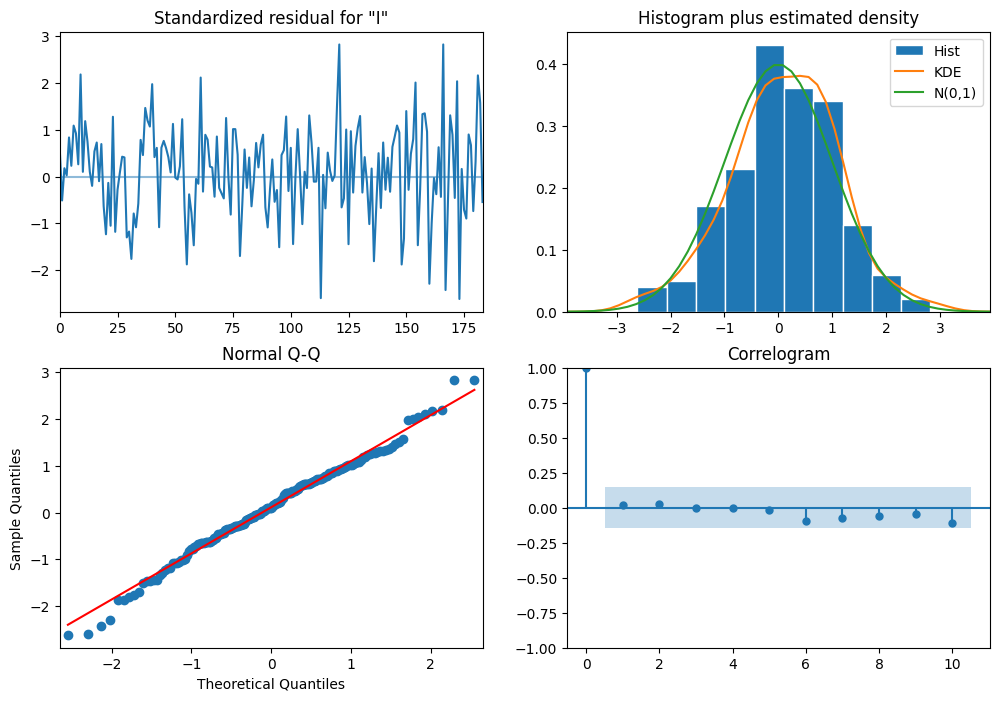

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9917319416999817 0.37234267592430115


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.0741227420865492, 0.9409127194667485)

In [ ]:
#Uji Heteroskedastisitas
fitted_model.test_heteroskedasticity('breakvar')

array([[1.68088085, 0.04458226]])

**Model Tentative ARIMAX(1,1,0) - Tidak Memenuhi**

In [ ]:
#Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(1,1,0))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:           ImporHS04Ton   No. Observations:                  185
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1894.465
Date:                Sun, 05 May 2024   AIC                           3794.930
Time:                        11:52:28   BIC                           3804.575
Sample:                             0   HQIC                          3798.839
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3140.8065   1164.014     -2.698      0.007   -5422.233    -859.380
ar.L1         -0.4234      0.055     -7.648      0.000      -0.532      -0.315
sigma2       5.09e+07      0.061   8.29e+08      0.0

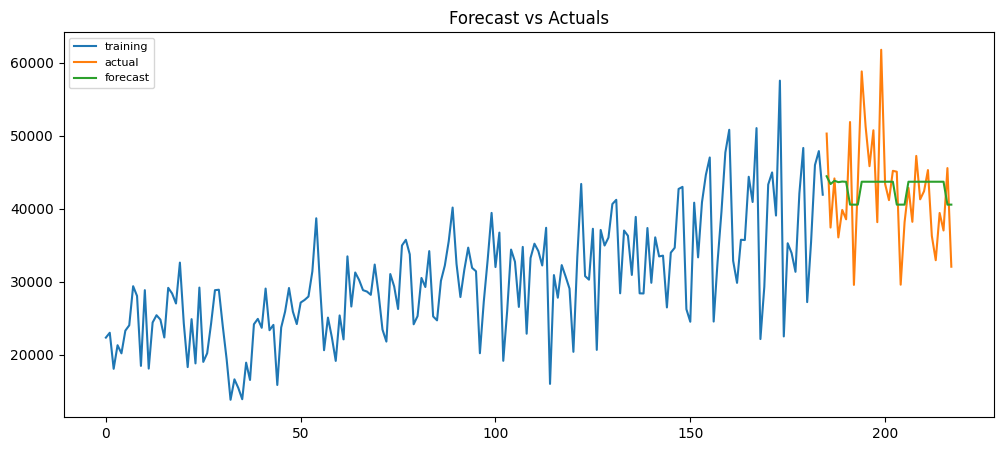

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7107.828068485479
MAPE:  13.960235930391098


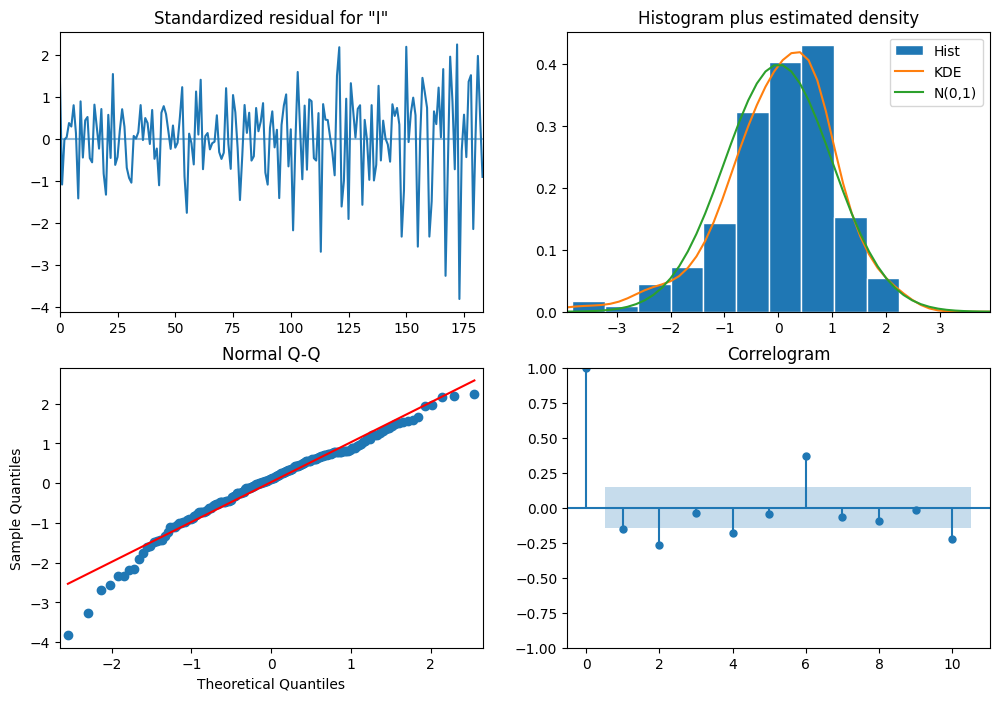

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9734469652175903 0.0013518721098080277


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(1.6020765970597672, 0.10913867243450757)

In [ ]:
#Uji Heteroskedastisitas
fitted_model.test_heteroskedasticity('breakvar')

array([[3.40339558e+00, 3.72030546e-06]])

**Model Tentative ARIMAX(0,1,1) - Tidak Memenuhi**

In [ ]:
#Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(0,1,1))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:           ImporHS04Ton   No. Observations:                  185
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1868.526
Date:                Sat, 04 May 2024   AIC                           3743.053
Time:                        13:39:21   BIC                           3752.698
Sample:                             0   HQIC                          3746.962
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3130.9513    965.697     -3.242      0.001   -5023.683   -1238.220
ma.L1         -0.8888      0.031    -29.028      0.000      -0.949      -0.829
sigma2      3.842e+07      0.043   8.88e+08      0.0

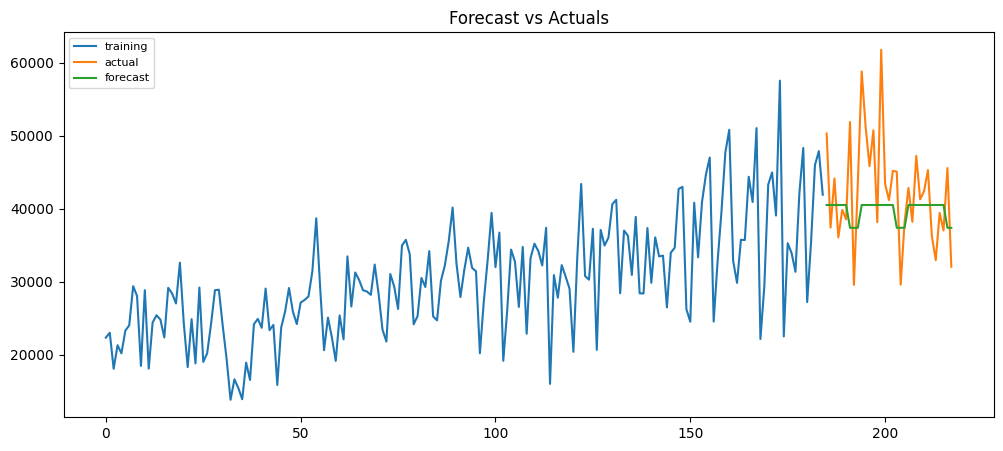

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7617.9828959034285
MAPE:  13.227592889345635


In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9861149191856384 0.0650455430150032


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(-1.2355273241909166, 0.21663431366070685)

In [ ]:
#Uji Heteroskedastisitas
fitted_model.test_heteroskedasticity('breakvar')

array([[2.27443060e+00, 1.61775794e-03]])

**Model Tentative ARIMAX(1,1,1) - Tidak Memenuhi**

In [ ]:
#Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(1,1,1))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:           ImporHS04Ton   No. Observations:                  185
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1867.903
Date:                Sat, 04 May 2024   AIC                           3743.807
Time:                        13:39:39   BIC                           3756.666
Sample:                             0   HQIC                          3749.019
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3133.6070   1010.915     -3.100      0.002   -5114.964   -1152.250
ar.L1          0.0899      0.086      1.050      0.294      -0.078       0.258
ma.L1         -0.9029      0.041    -21.876      0.0

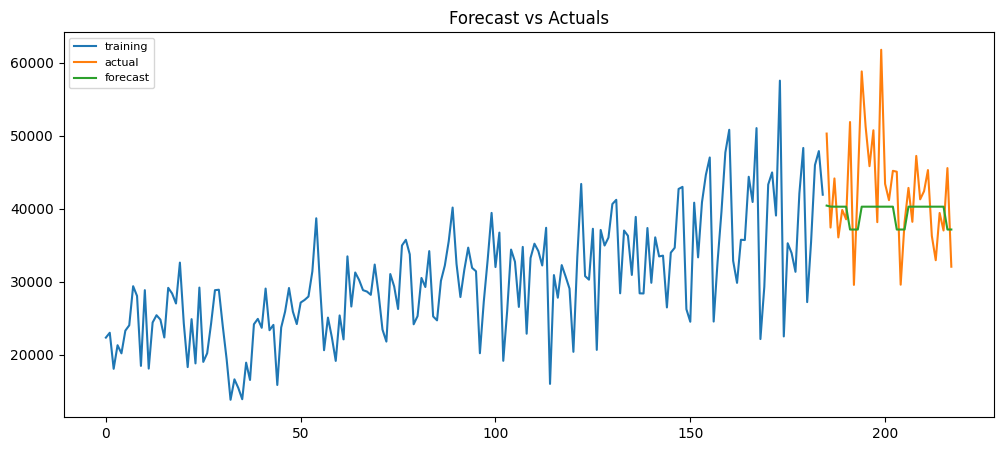

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7697.479845731924
MAPE:  13.266059502205895


In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9834724068641663 0.027874043211340904


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(-0.8075697799466411, 0.4193382893066532)

In [ ]:
#Uji Heteroskedastisitas
fitted_model.test_heteroskedasticity('breakvar')

array([[2.40660678e+00, 7.70667259e-04]])

**Model Tentative ARIMAX (2,1,0) - Tidak Terpenuhi**

In [ ]:
#Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(2,1,0))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:           ImporHS04Ton   No. Observations:                  185
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -1886.044
Date:                Sat, 04 May 2024   AIC                           3780.088
Time:                        13:40:03   BIC                           3792.948
Sample:                             0   HQIC                          3785.301
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3140.8065   1054.364     -2.979      0.003   -5207.322   -1074.291
ar.L1         -0.5596      0.059     -9.416      0.000      -0.676      -0.443
ar.L2         -0.2900      0.078     -3.739      0.0

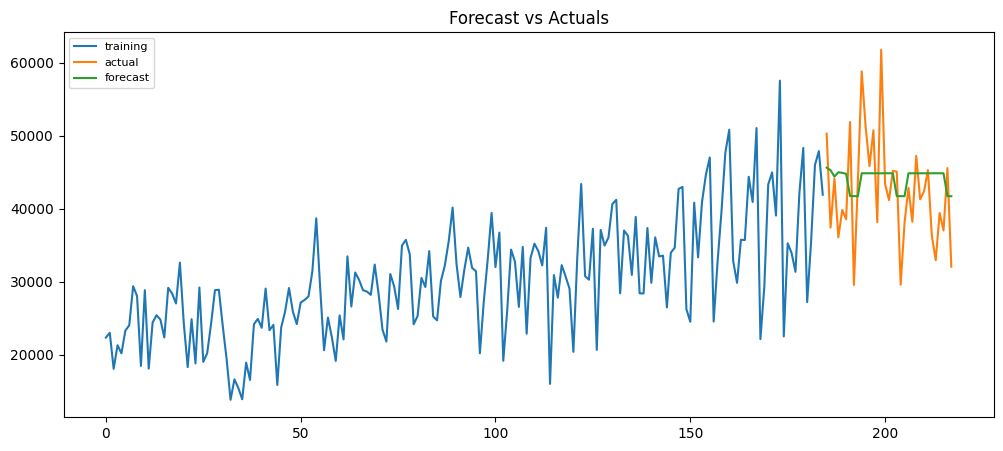

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

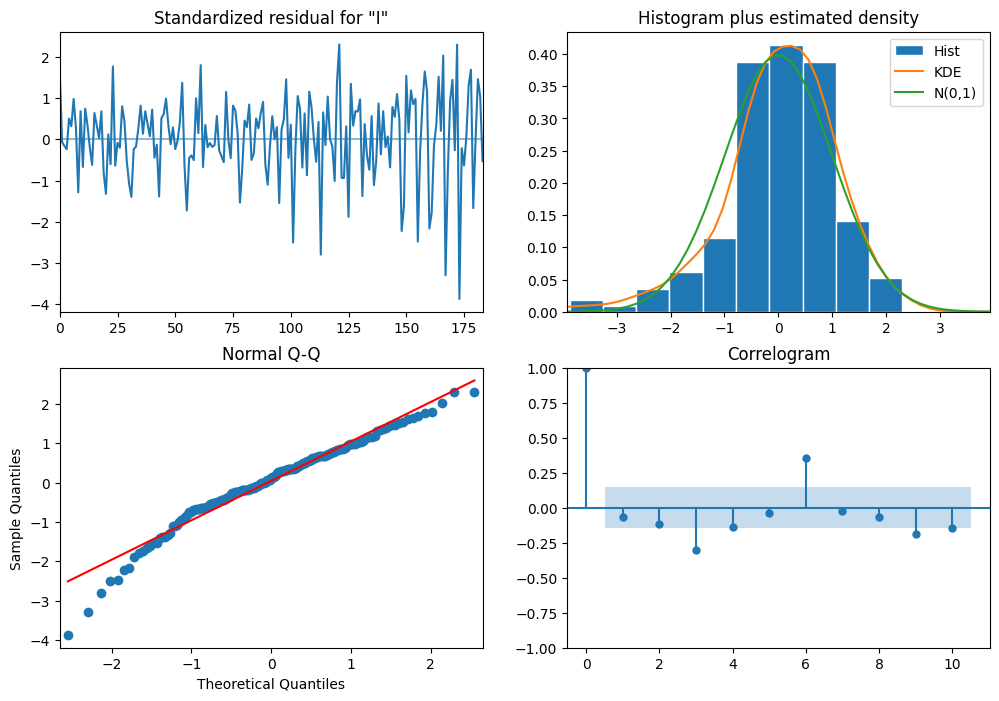

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7309.598908731088
MAPE:  14.894784991301298


In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9712008237838745 0.0007221446139737964


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(-0.2019304993671194, 0.8399710581451015)

In [ ]:
#Uji Heteroskedastisitas
fitted_model.test_heteroskedasticity('breakvar')

array([[3.13658041e+00, 1.46813827e-05]])

**Model Tentative ARIMAX (2,1,1) - Tidak Terpenuhi**

In [ ]:
#Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek', 'Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(2,1,1))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:           ImporHS04Ton   No. Observations:                  185
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1875.791
Date:                Sat, 04 May 2024   AIC                           3763.582
Time:                        13:40:43   BIC                           3782.872
Sample:                             0   HQIC                          3771.400
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3218.7783   1217.933     -2.643      0.008   -5605.882    -831.674
Inflasi(%)   915.5768    345.296      2.652      0.008     238.809    1592.345
ar.L1          0.1206      0.120      1.007      0.3

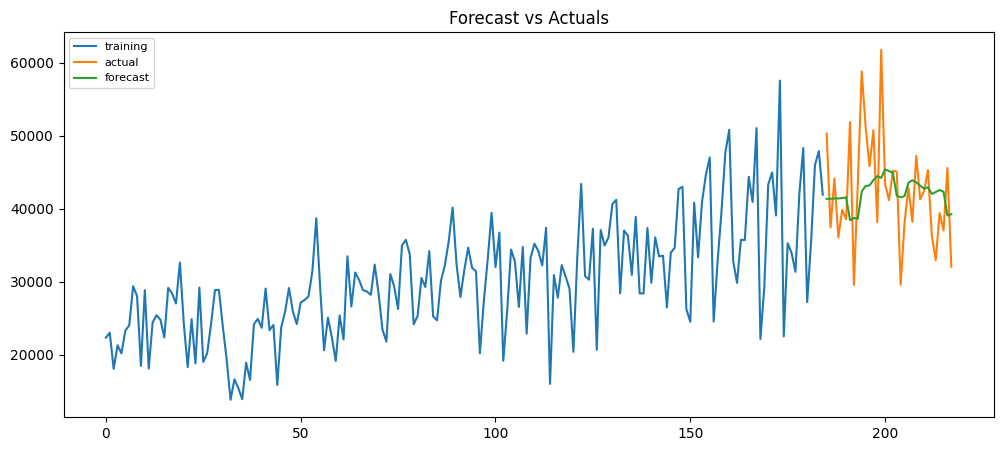

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek', 'Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

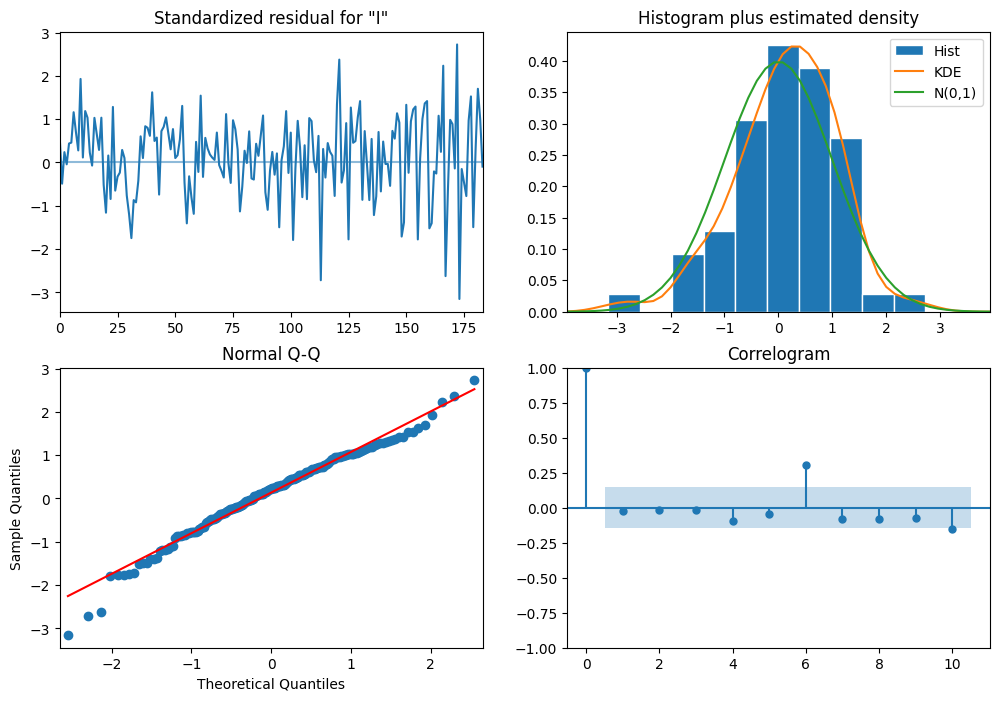

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7109.506227060124
MAPE:  13.573720252454152


In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9826171398162842 0.021248018369078636


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.16447120566252732, 0.8693602126033597)

**Model Tentative ARIMAX (3,1,0) - Tidak Terpenuhi**

In [ ]:
#Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek', 'Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(3,1,0))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:           ImporHS04Ton   No. Observations:                  185
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -1883.376
Date:                Sat, 04 May 2024   AIC                           3778.752
Time:                        13:42:47   BIC                           3798.041
Sample:                             0   HQIC                          3786.570
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3218.7783   1115.751     -2.885      0.004   -5405.610   -1031.947
Inflasi(%)   915.5785    452.360      2.024      0.043      28.968    1802.189
ar.L1         -0.6040      0.064     -9.423      0.0

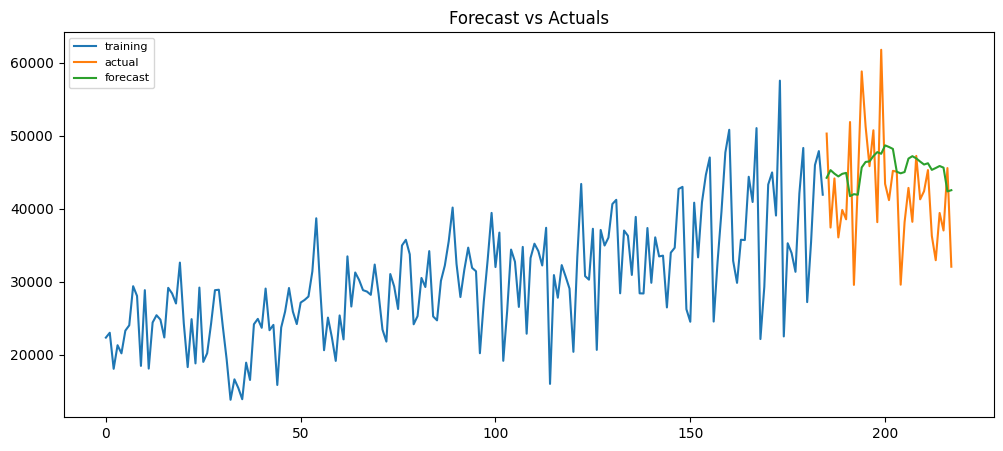

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek', 'Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

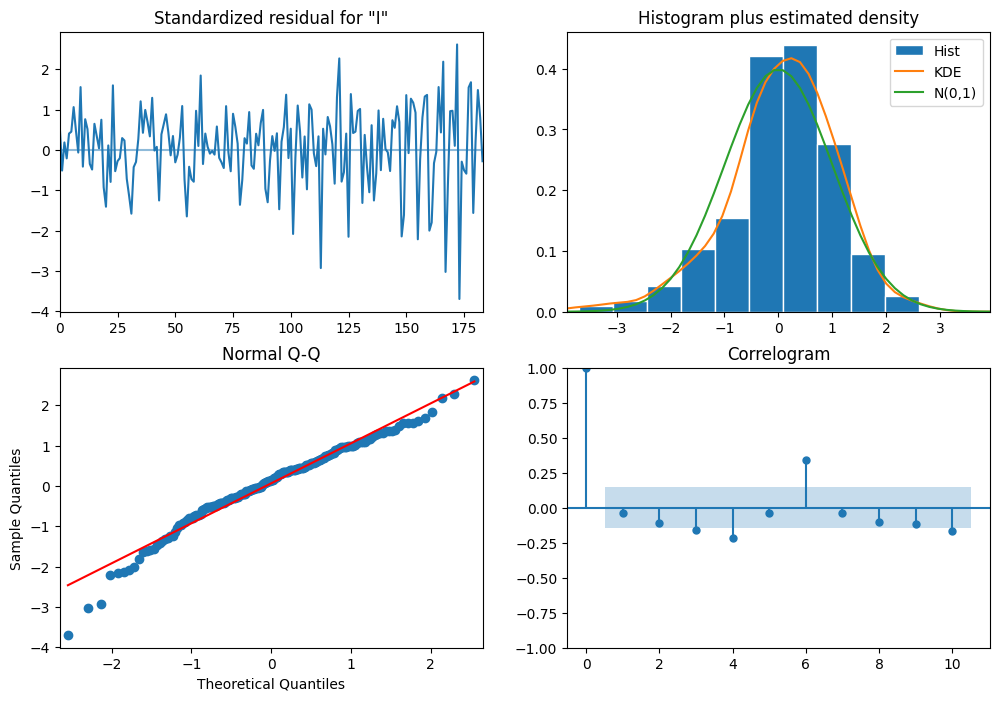

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7762.834076032804
MAPE:  16.560715029026195


In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9740817546844482 0.0016194658819586039


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.16447120566252732, 0.8693602126033597)

**Model Tentative ARIMAX (3,1,1) - Tidak Terpenuhi**

In [ ]:
#Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(3,1,1))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:           ImporHS04Ton   No. Observations:                  185
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1868.991
Date:                Sat, 04 May 2024   AIC                           3749.982
Time:                        13:44:44   BIC                           3769.272
Sample:                             0   HQIC                          3757.800
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3140.8064   1209.436     -2.597      0.009   -5511.257    -770.356
ar.L1          0.0738      0.113      0.654      0.513      -0.147       0.295
ar.L2         -0.0456      0.116     -0.393      0.6

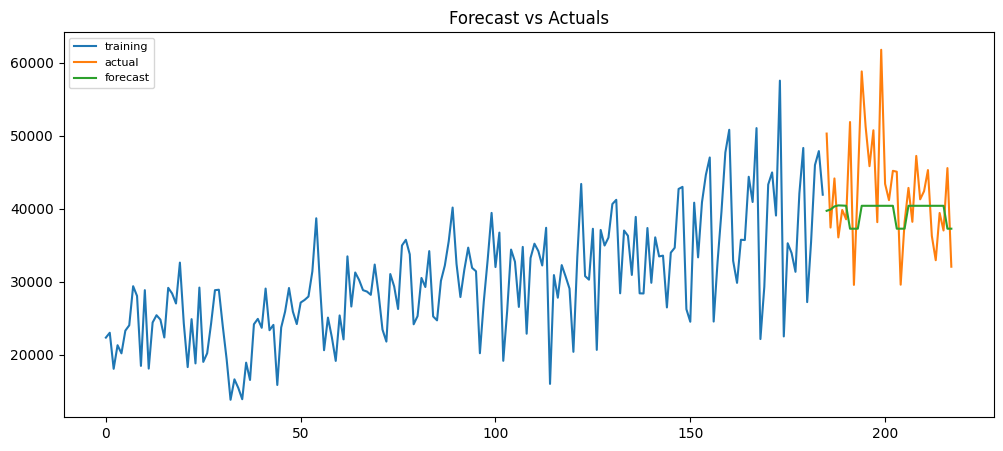

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

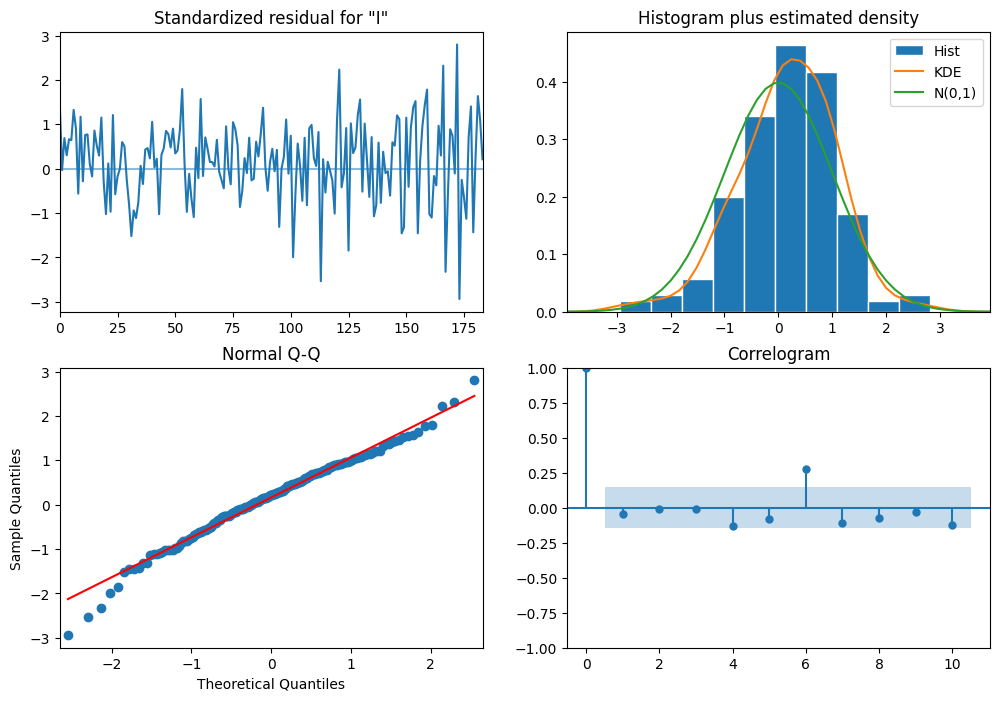

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7683.2897999468705
MAPE:  13.263317348950082


In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9838538765907288 0.03147925063967705


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(-0.9491215115031943, 0.34255881479322714)

**Model Tentative ARIMAX (4,1,0) - Tidak Terpenuhi**

In [ ]:
#Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek', 'Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(4,1,0))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:           ImporHS04Ton   No. Observations:                  185
Model:               SARIMAX(4, 1, 0)   Log Likelihood               -1879.787
Date:                Sat, 04 May 2024   AIC                           3773.573
Time:                        13:46:38   BIC                           3796.078
Sample:                             0   HQIC                          3782.695
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3218.7783   1062.651     -3.029      0.002   -5301.536   -1136.020
Inflasi(%)   915.5785    404.853      2.262      0.024     122.081    1709.076
ar.L1         -0.6332      0.068     -9.332      0.0

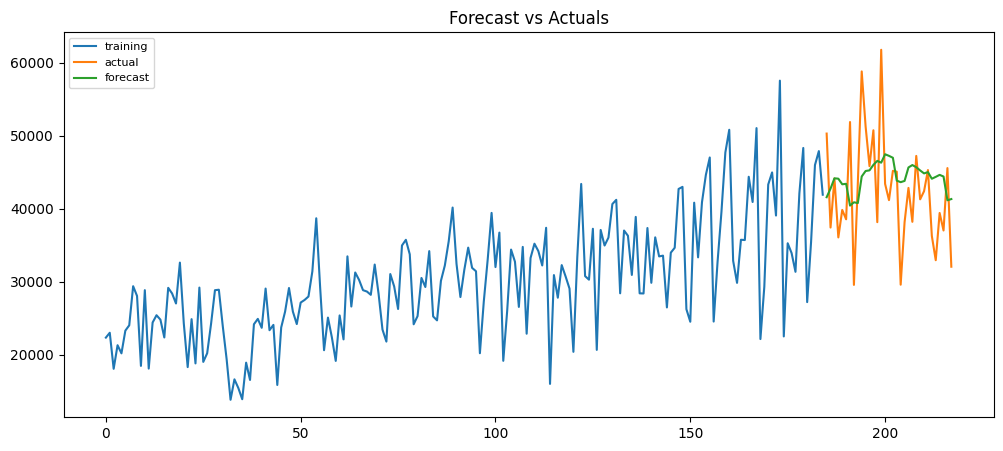

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek', 'Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

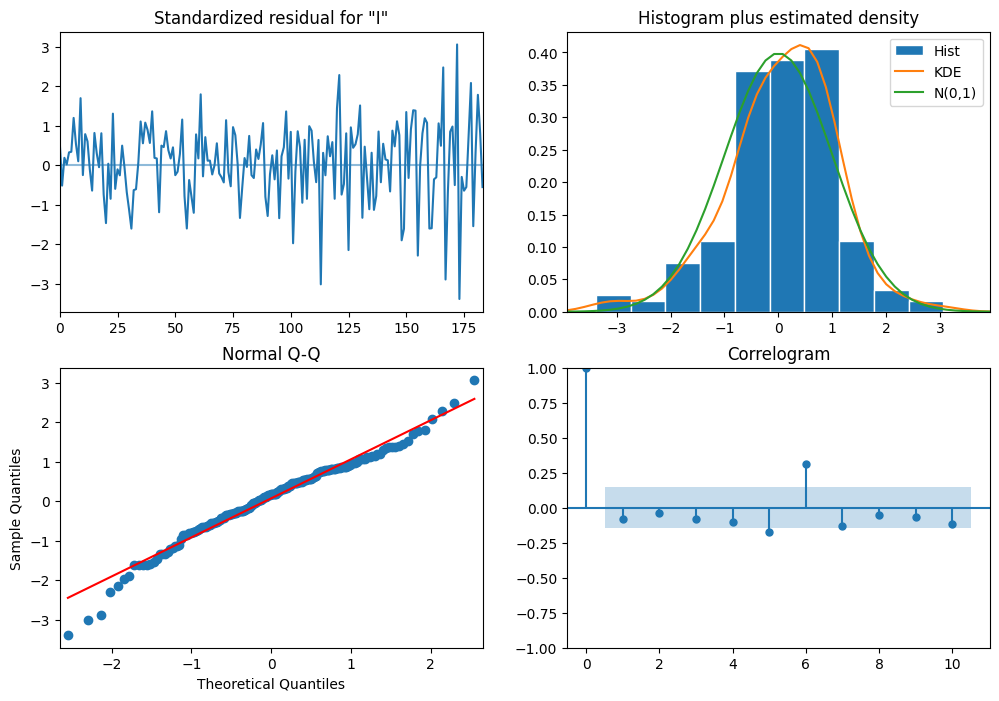

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7409.52835523843
MAPE:  15.267119426109096


In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9798556566238403 0.00897805206477642


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(-0.40432144017833005, 0.6859763612824108)

**Model Tentative ARIMAX (4,1,1) - Tidak Terpenuhi**

In [ ]:
#Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek', 'Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(4,1,1))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:           ImporHS04Ton   No. Observations:                  185
Model:               SARIMAX(4, 1, 1)   Log Likelihood               -1874.230
Date:                Sat, 04 May 2024   AIC                           3764.460
Time:                        13:48:32   BIC                           3790.180
Sample:                             0   HQIC                          3774.885
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3218.7782   1140.676     -2.822      0.005   -5454.461    -983.095
Inflasi(%)   915.5772    342.947      2.670      0.008     243.414    1587.740
ar.L1         -0.0944      0.180     -0.523      0.6

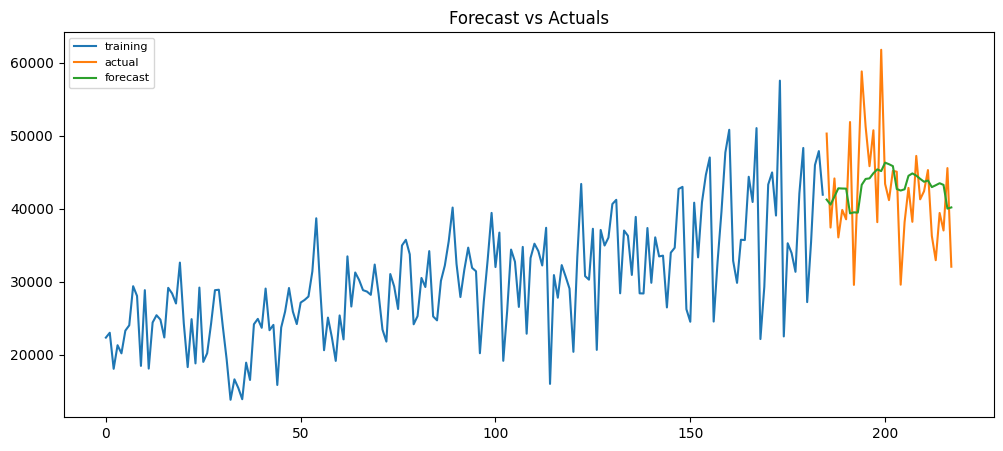

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek', 'Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

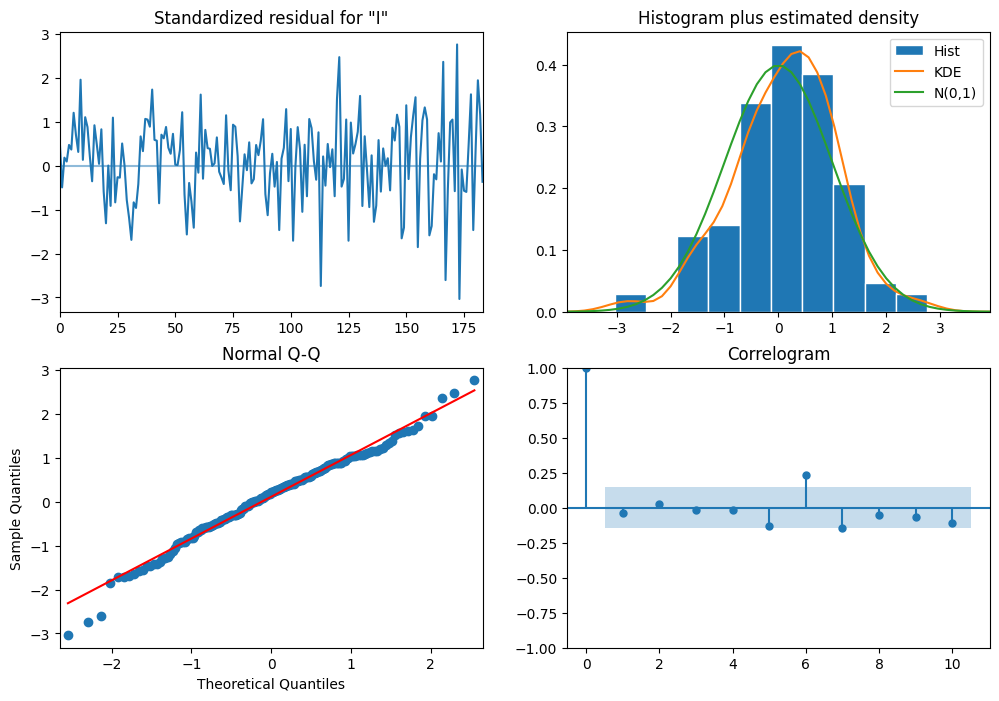

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7172.82979055551
MAPE:  14.335434204220189


In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9872285723686218 0.0930611714720726


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.1417720544263138, 0.8872600584090434)

**Model Tentative ARIMAX (5,1,1) - Tidak Terpenuhi**

In [ ]:
#Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek', 'Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(5,1,1))
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:           ImporHS04Ton   No. Observations:                  185
Model:               SARIMAX(5, 1, 1)   Log Likelihood               -1864.914
Date:                Sat, 04 May 2024   AIC                           3747.827
Time:                        13:50:20   BIC                           3776.762
Sample:                             0   HQIC                          3759.555
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3218.7781    955.410     -3.369      0.001   -5091.347   -1346.209
Inflasi(%)   915.5765    289.323      3.165      0.002     348.514    1482.639
ar.L1         -0.8729      0.183     -4.776      0.0

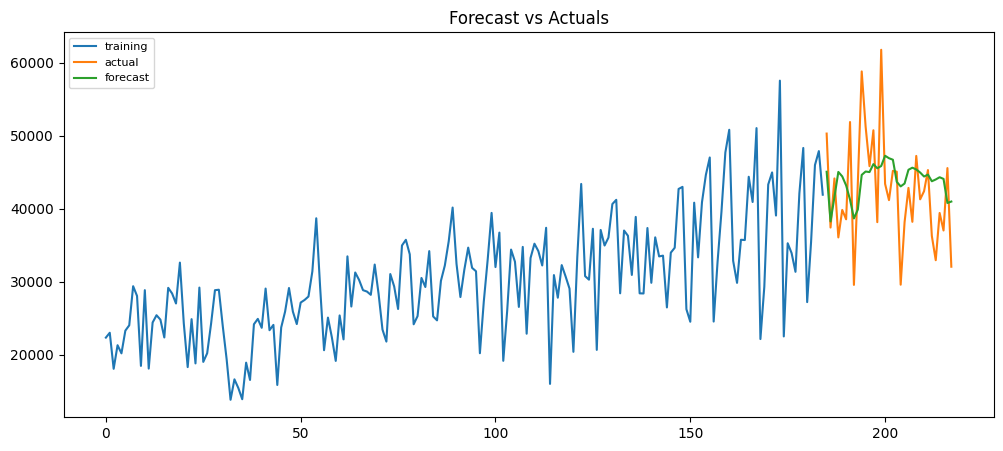

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek', 'Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

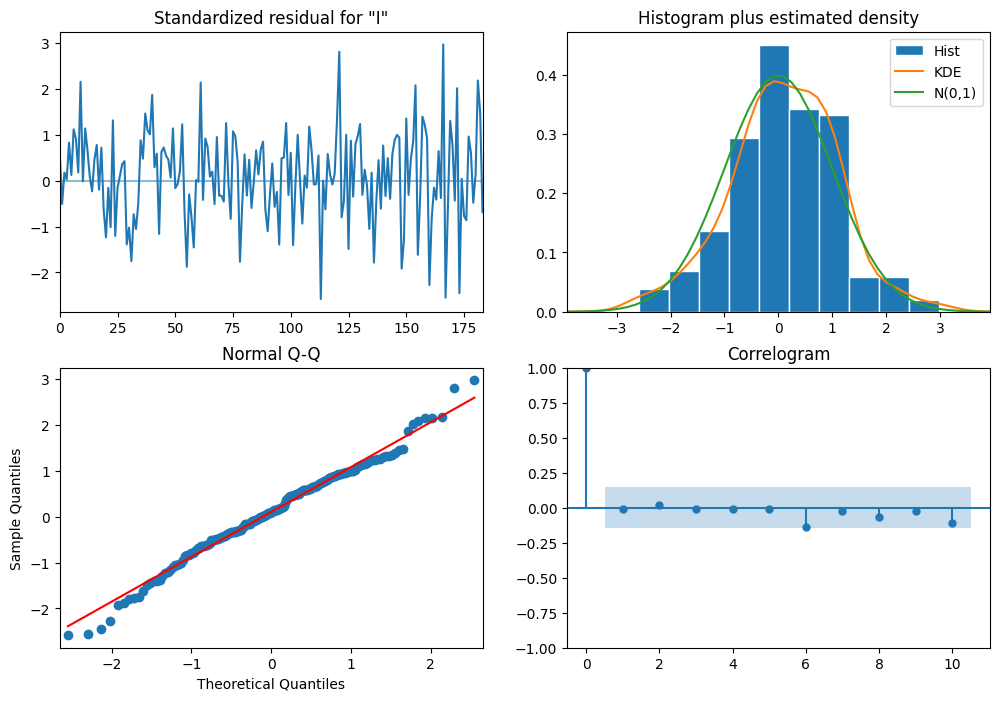

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7047.952839662789
MAPE:  14.428845354917453


In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9906163811683655 0.26904112100601196


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.3690196729685172, 0.7121130611465464)

## **SARIMAX MODEL**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import t
from statsmodels.tsa.stattools import adfuller
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from PythonTsa.plot_acf_pacf import acf_pacf_fig
import statsmodels.tsa.api as smt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [ ]:
df_hs04 = pd.read_csv('HS04RibuTon.csv')
start_date = "2006-01-01"
end_date = "2024-02-28"
date_range = pd.date_range(start=start_date, end=end_date, freq="M")
print(df_hs04)

    Tanggal  ImporHS04RibuTon  Eks_IdulFitri  Eks_IdulAdha  Eks_Imlek  \
0     6-Jan            22.321              0             0          1   
1     6-Feb            22.988              0             0          1   
2     6-Mar            18.043              0             0          0   
3     6-Apr            21.278              0             0          0   
4     6-May            20.163              0             0          0   
..      ...               ...            ...           ...        ...   
213  23-Oct            32.940              0             0          0   
214  23-Nov            39.418              0             0          0   
215  23-Dec            37.017              0             0          0   
216  24-Jan            45.576              0             0          1   
217  24-Feb            32.046              0             0          1   

     Eks_Natal  Inflasi(%)  USDtoRP  Unnamed: 8  
0            1       17.03     9395      22.321  
1            0       17

In [ ]:
train_size = int(len(df_hs04) * 0.85)
train_data = df_hs04.iloc[:train_size]
test_data = df_hs04.iloc[train_size:]

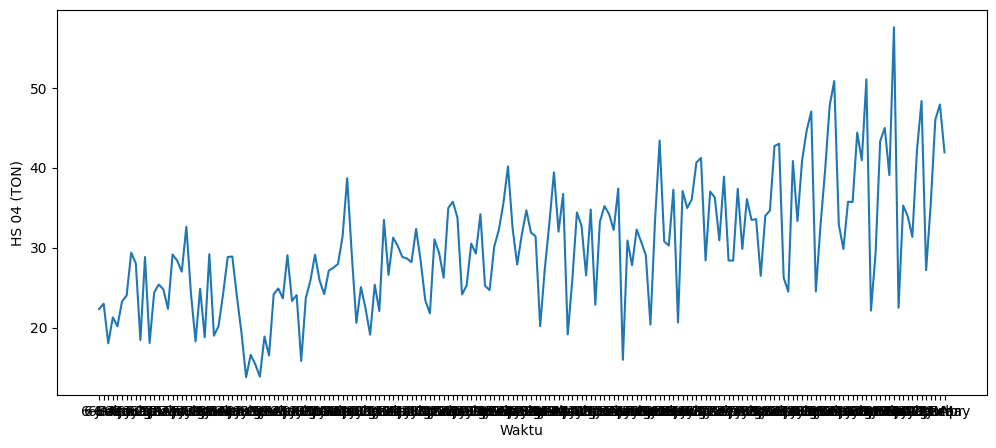

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(train_data.Tanggal, train_data.ImporHS04RibuTon)
plt.xlabel('Waktu'), plt.ylabel('HS 04 (TON)')
plt.show()

<Figure size 1000x800 with 0 Axes>

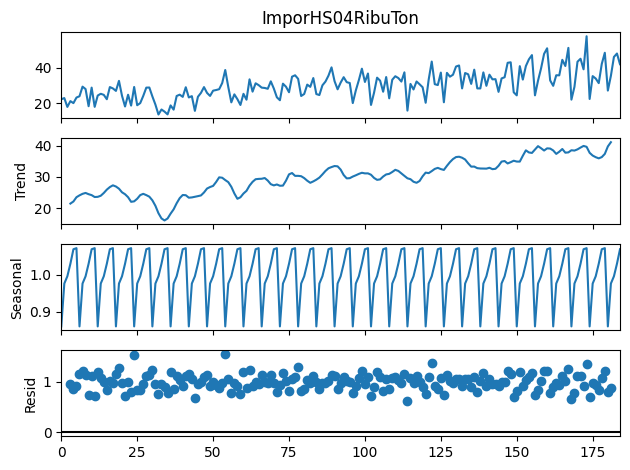

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(train_data['ImporHS04RibuTon'], model='multiplicative', period=6)
plt.figure(figsize=(10,8), facecolor='white')
result_mul.plot()
plt.show()

In [ ]:
adf = adfuller(train_data['ImporHS04RibuTon'],autolag='AIC')[1]
print(adf)

0.9051122522155209


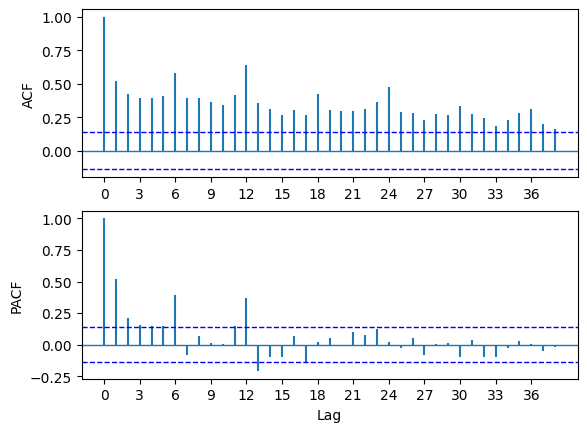

In [ ]:
acf_pacf_fig(train_data.ImporHS04Ton,both=True,lag=38);plt.show()

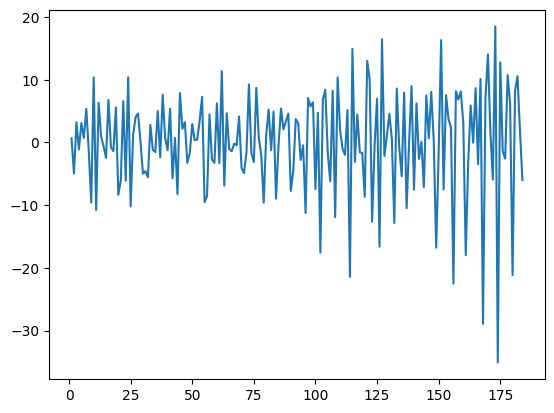

In [ ]:
d1 = train_data['ImporHS04RibuTon'].diff().dropna()
plt.plot(d1)

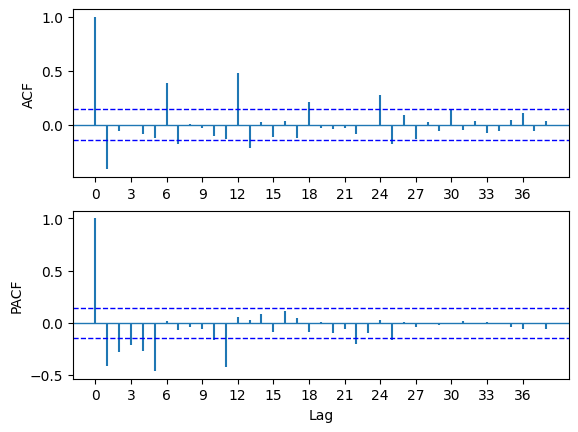

In [ ]:
acf_pacf_fig(d1,both=True,lag=38);plt.show()

In [ ]:
adf_d1 = adfuller(d1,autolag='AIC')[1]
print(adf_d1)

8.688820621008313e-10


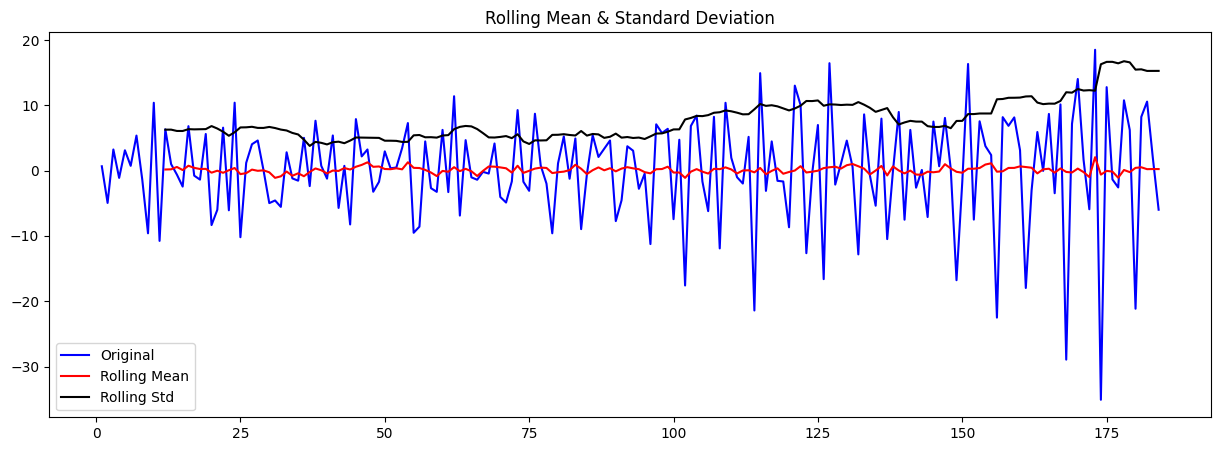

Results of Dickey-Fuller Test:
Test Statistic                -6.970522e+00
p-value                        8.688821e-10
#Lags Used                     1.100000e+01
Number of Observations Used    1.720000e+02
Critical Value (1%)           -3.468952e+00
Critical Value (5%)           -2.878495e+00
Critical Value (10%)          -2.575809e+00
dtype: float64


In [ ]:
test_stationarity(d1)

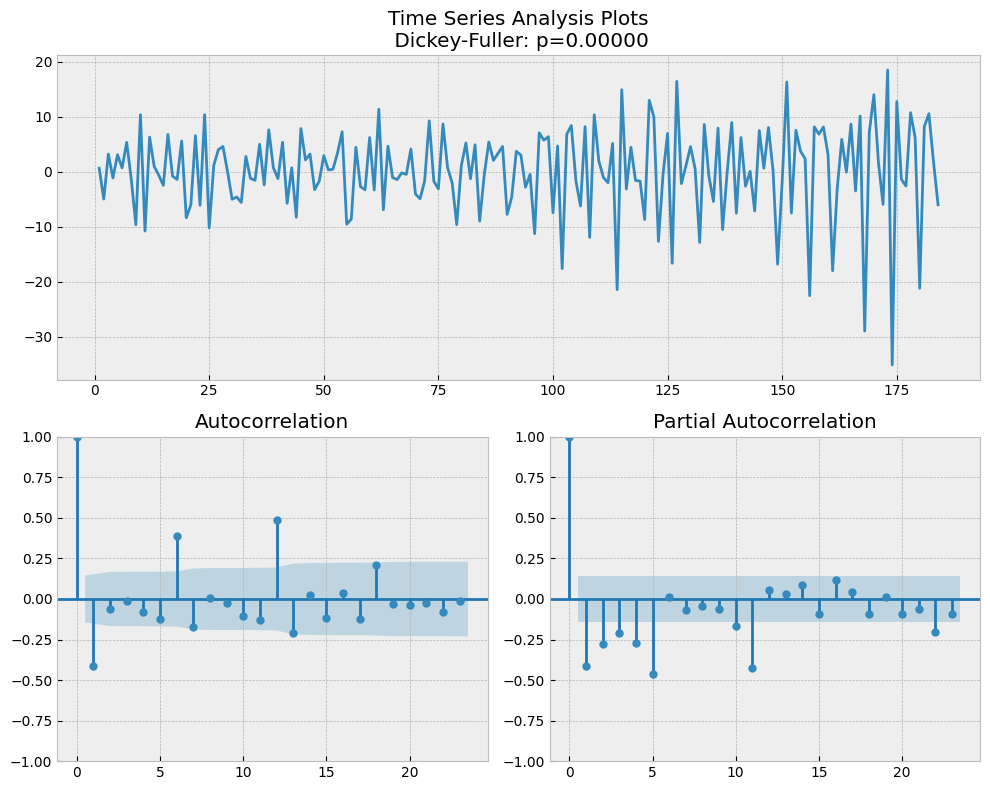

In [ ]:
tsplot(d1)

Jika ditinjau dari plot ACF dan PACF, didapatkan kesimpulan bahwa model non-musiman ACF (cut off lag-1), PACF (cut off lag-5) dan model musiman ACF (Cut off lag 4), PACF (dies down)

In [ ]:
from pmdarima import auto_arima

exog_vars = train_data[['Eks_IdulFitri', 'Eks_IdulAdha', 'Eks_Imlek', 'Eks_Natal', 'Inflasi(%)','USDtoRP']]
model = auto_arima(train_data['ImporHS04RibuTon'], exogenous=exog_vars,
                   start_p=0, start_q=0,start_P=0, start_Q=0, m=6, with_intercept= True, d=1,
                   max_P=4,
                   seasonal=True, stepwise=True, trace=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[6] intercept   : AIC=1294.020, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[6] intercept   : AIC=1229.216, Time=0.47 sec
 ARIMA(0,1,1)(0,0,1)[6] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[6]             : AIC=1292.052, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[6] intercept   : AIC=1261.730, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[6] intercept   : AIC=1181.841, Time=0.76 sec
 ARIMA(1,1,0)(3,0,0)[6] intercept   : AIC=1183.510, Time=0.96 sec
 ARIMA(1,1,0)(2,0,1)[6] intercept   : AIC=1183.484, Time=0.77 sec
 ARIMA(1,1,0)(1,0,1)[6] intercept   : AIC=1201.862, Time=0.97 sec
 ARIMA(1,1,0)(3,0,1)[6] intercept   : AIC=1185.469, Time=3.04 sec
 ARIMA(0,1,0)(2,0,0)[6] intercept   : AIC=1222.965, Time=0.78 sec
 ARIMA(2,1,0)(2,0,0)[6] intercept   : AIC=1166.621, Time=1.11 sec
 ARIMA(2,1,0)(1,0,0)[6] intercept   : AIC=1217.483, Time=0.41 sec
 ARIMA(2,1,0)(3,0,0)[6] intercept   : AIC=1168.373, Time=1.58 sec
 ARIMA(2,1,0)(2,0,1)[6] intercept   : 

**SARIMAX (1,1,0)(1,0,0)[6] - Tidak Memenuhi**

In [ ]:
# Overfitting Parameter
endog = train_data['ImporHS04RibuTon']
exog = train_data[['Eks_Imlek']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(1,1,0), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                  ImporHS04RibuTon   No. Observations:                  185
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 6)   Log Likelihood                -607.788
Date:                           Mon, 20 May 2024   AIC                           1223.575
Time:                                   03:45:28   BIC                           1236.435
Sample:                                        0   HQIC                          1228.787
                                           - 185                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek     -2.4746      1.048     -2.362      0.018      -4.528      -0.421
ar.L1         -0.4567      0.069     -6.603

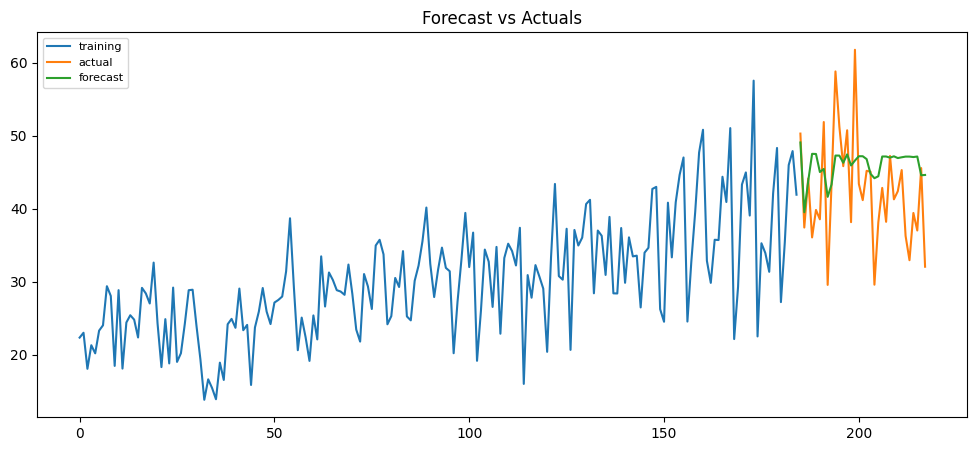

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04RibuTon, label='training')
plt.plot(test_data.ImporHS04RibuTon, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04RibuTon, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04RibuTon - fc) / test_data.ImporHS04RibuTon)) * 100
print('MAPE: ', mape)

RMSE:  7.7520491103285
MAPE:  16.00443535470183


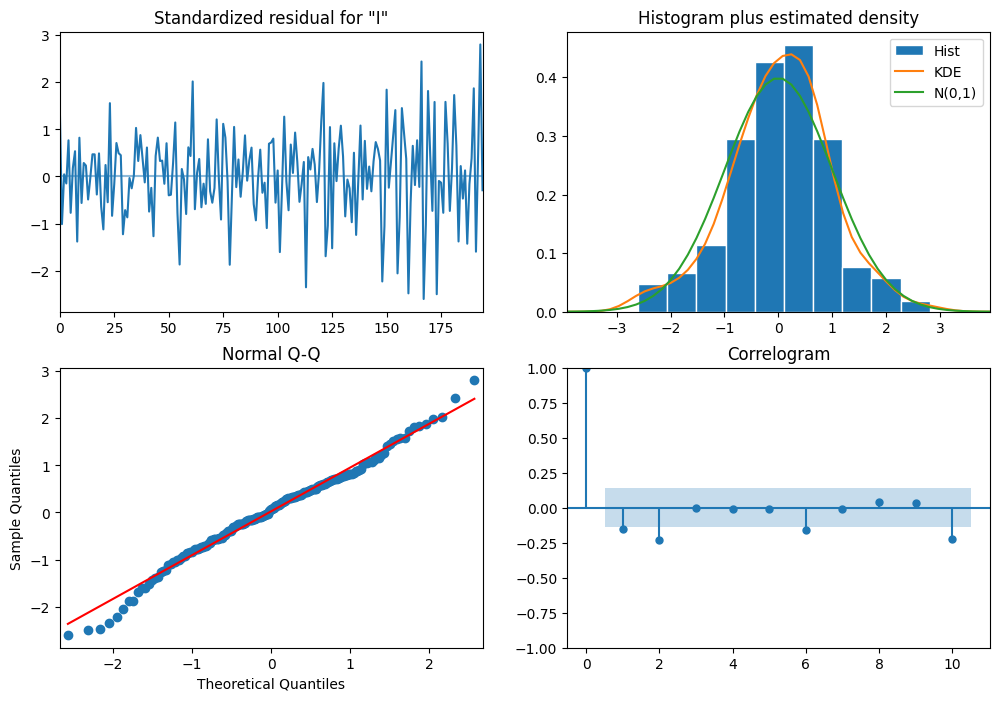

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9855300784111023 0.0538855716586113


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.9793230147172203, 0.32742040229262204)

** SARIMAX (0,1,1)(1,0,0)[6] - Memenuhi **

In [ ]:
# Overfitting Parameter
endog = train_data['ImporHS04RibuTon']
exog = train_data[['Eks_Imlek']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(0,1,1), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                   ImporHS04RibuTon   No. Observations:                  185
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 6)   Log Likelihood                -585.268
Date:                            Mon, 20 May 2024   AIC                           1178.535
Time:                                    03:46:23   BIC                           1191.395
Sample:                                         0   HQIC                          1183.748
                                            - 185                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek     -1.6769      0.816     -2.055      0.040      -3.276      -0.078
ma.L1         -0.9209      0.028   

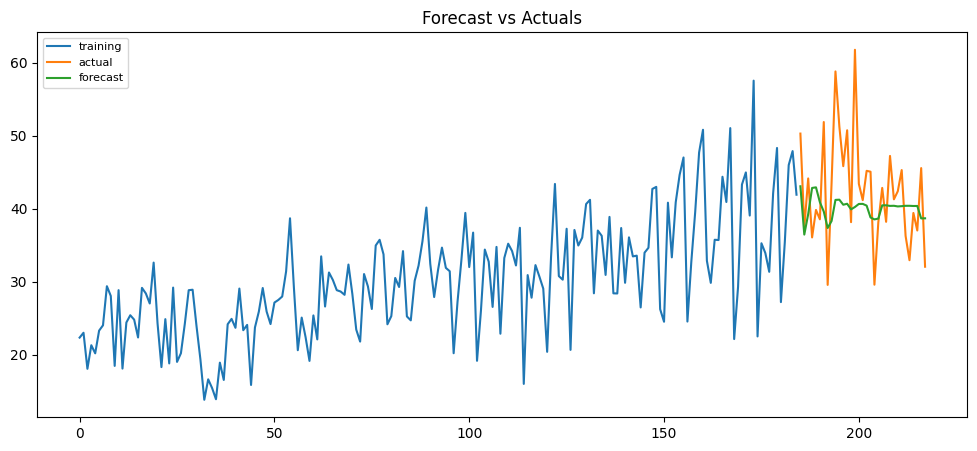

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04RibuTon, label='training')
plt.plot(test_data.ImporHS04RibuTon, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04RibuTon, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04RibuTon - fc) / test_data.ImporHS04RibuTon)) * 100
print('MAPE: ', mape)

RMSE:  7.386977873599471
MAPE:  13.098446560216454


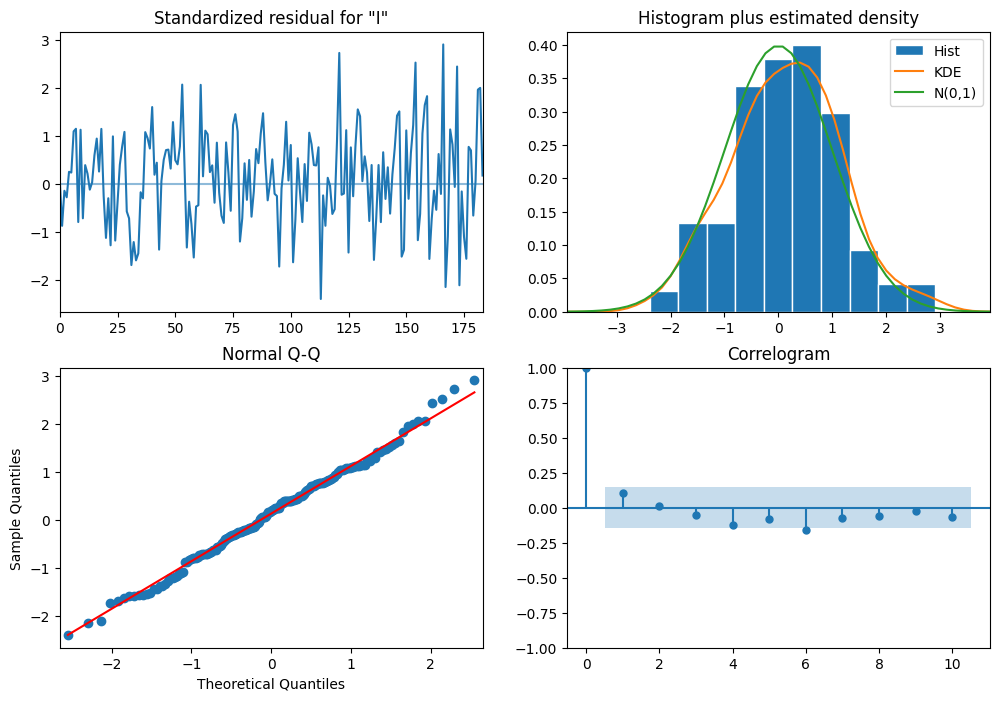

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9880895018577576 0.12257813662290573


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(-1.8261540812330863, 0.06782705586406255)

In [ ]:
fitted_model.test_heteroskedasticity('breakvar')

array([[1.82157134, 0.02059848]])

**SARIMAX (1,1,1)(1,0,0)[6] - Tidak Memenuhi**

In [ ]:
# Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(1,1,1), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       ImporHS04Ton   No. Observations:                  185
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 6)   Log Likelihood               -1862.001
Date:                            Sun, 12 May 2024   AIC                           3734.003
Time:                                    04:42:39   BIC                           3750.077
Sample:                                         0   HQIC                          3740.518
                                            - 185                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3140.8058   1163.794     -2.699      0.007   -5421.801    -859.811
ar.L1          0.1561      0.120   

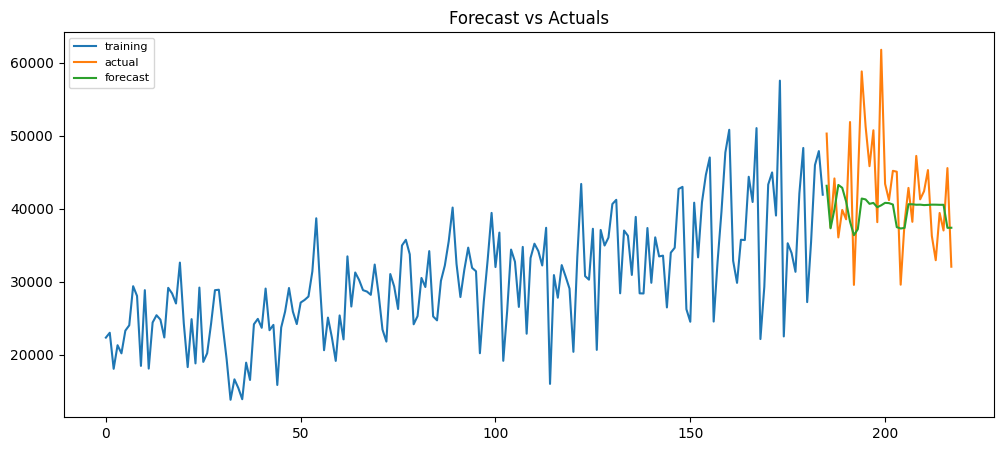

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7412.600581508192
MAPE:  12.983726915533675


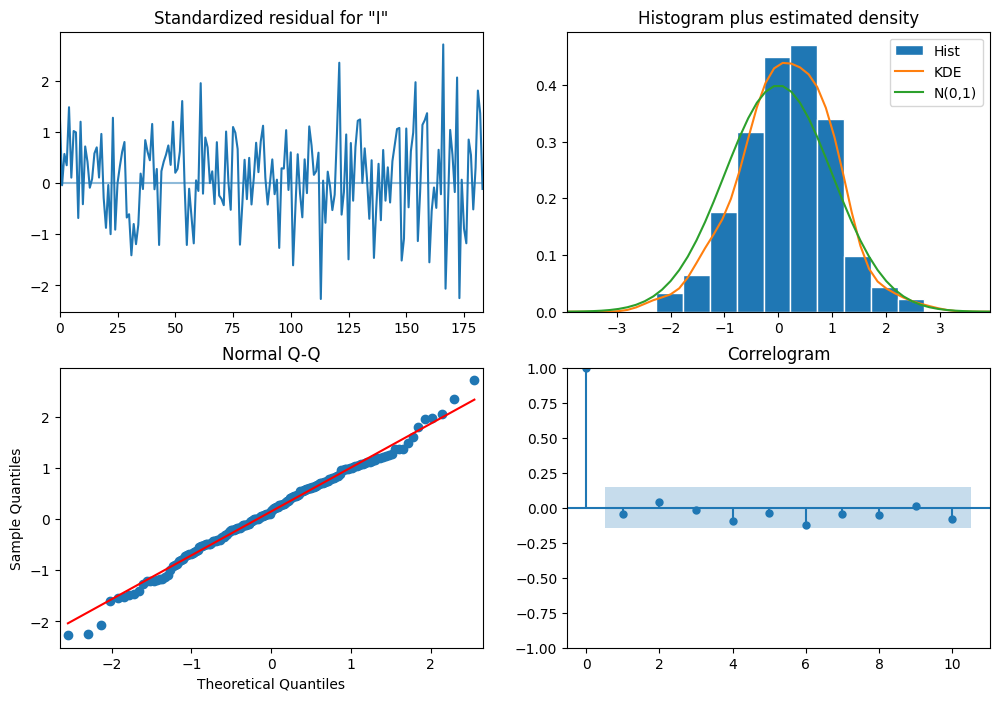

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9860581755638123 0.06386857479810715


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.6639166038504852, 0.5067436886482062)

**SARIMAX (2,1,0)(1,0,0)[6] - Tidak Memenuhi**

In [ ]:
# Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[[ 'Eks_Imlek']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(2,1,0), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      ImporHS04Ton   No. Observations:                  185
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 6)   Log Likelihood               -1874.417
Date:                           Sun, 12 May 2024   AIC                           3758.835
Time:                                   04:46:07   BIC                           3774.910
Sample:                                        0   HQIC                          3765.350
                                           - 185                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3140.8064   1117.130     -2.811      0.005   -5330.340    -951.273
ar.L1         -0.5694      0.077     -7.398

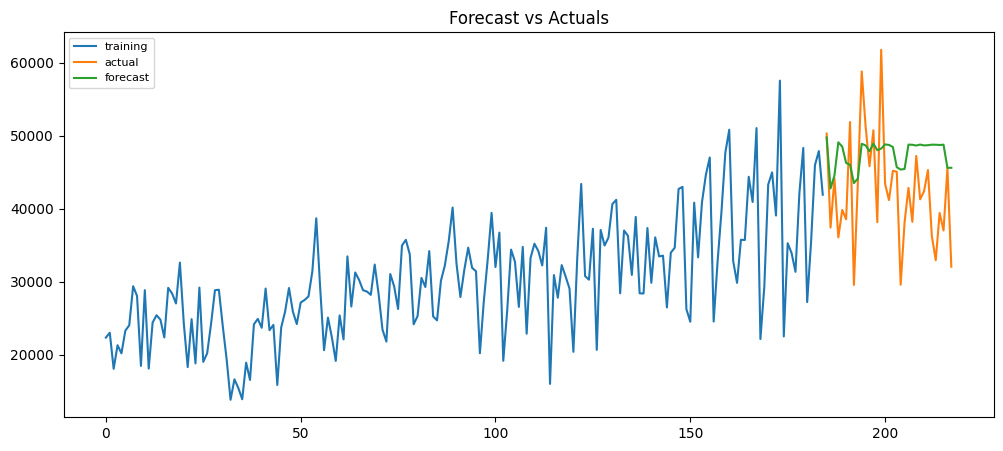

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  8586.274416827277
MAPE:  18.477676078445


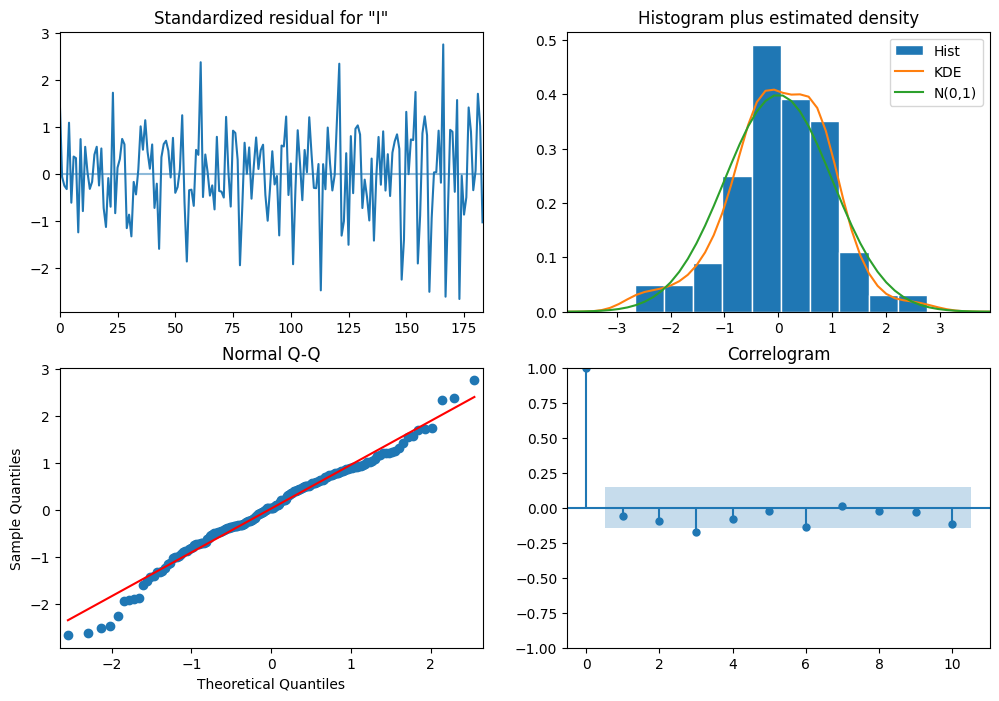

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9795392751693726 0.008147500455379486


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.37229524899810634, 0.709673035559989)

**SARIMAX (2,1,1)(1,0,0)[6] -  Tidak Memenuhi**

In [ ]:
# Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[[ 'Eks_Imlek', 'Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(2,1,1), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       ImporHS04Ton   No. Observations:                  185
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 6)   Log Likelihood               -1866.086
Date:                            Sun, 12 May 2024   AIC                           3746.171
Time:                                    04:59:32   BIC                           3768.676
Sample:                                         0   HQIC                          3755.292
                                            - 185                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3218.7773   1227.763     -2.622      0.009   -5625.149    -812.405
Inflasi(%)   915.5740    378.207   

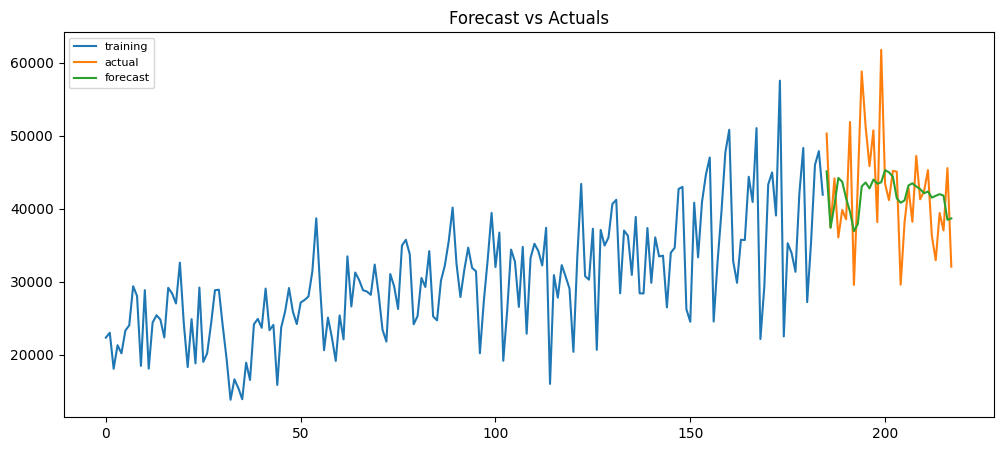

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[[ 'Eks_Imlek', 'Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  6832.382898883864
MAPE:  12.882372252927729


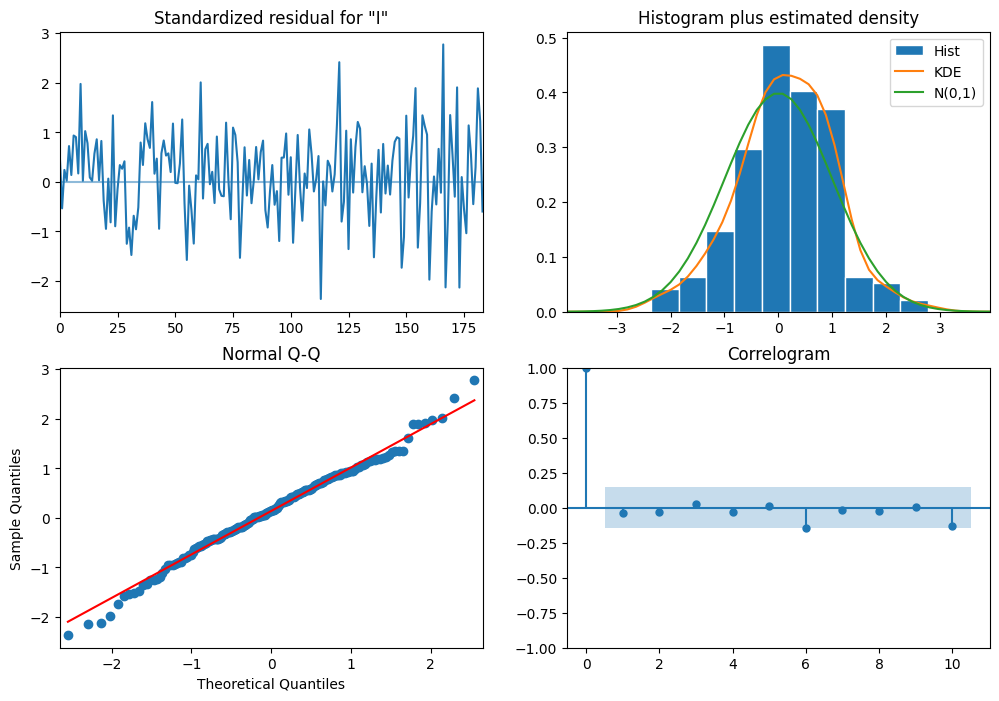

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9931654930114746 0.5440828800201416


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.6639166038504852, 0.5067436886482062)

**SARIMAX (3,1,0)(1,0,0)[6] -  Tidak Memenuhi**

In [ ]:
# Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_IdulAdha','Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(3,1,0), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      ImporHS04Ton   No. Observations:                  185
Model:             SARIMAX(3, 1, 0)x(1, 0, 0, 6)   Log Likelihood               -1878.103
Date:                           Sun, 12 May 2024   AIC                           3770.206
Time:                                   05:01:20   BIC                           3792.710
Sample:                                        0   HQIC                          3779.327
                                           - 185                                         
Covariance Type:                             opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Eks_IdulAdha  2272.9778   1384.370      1.642      0.101    -440.338    4986.293
Inflasi(%)     927.7535    603.474   

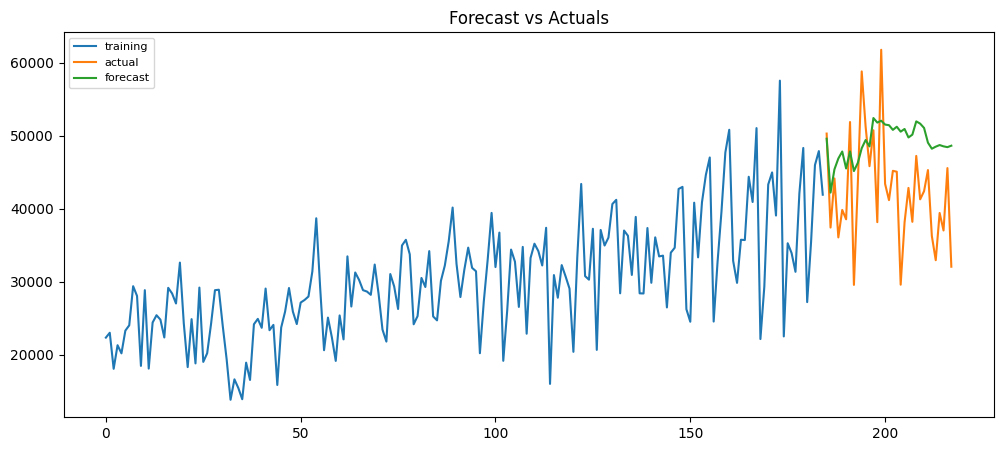

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_IdulAdha','Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  9653.426150414665
MAPE:  21.622909054881127


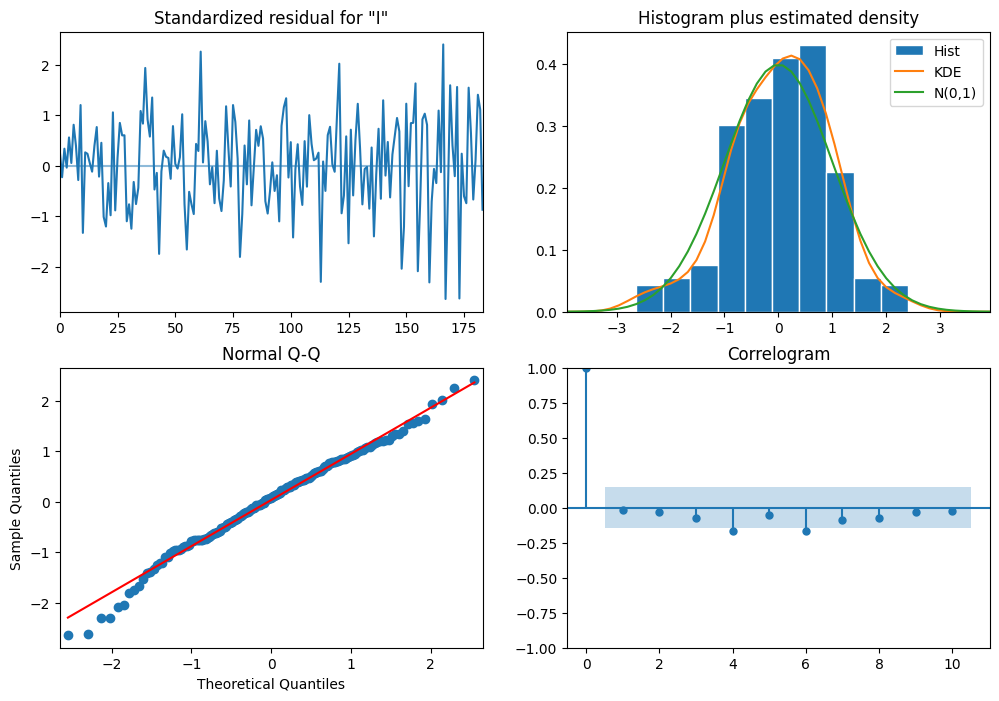

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9890881180763245 0.16814684867858887


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.10625321988778381, 0.9153814465263259)

**SARIMAX (3,1,1)(1,0,0)[6] -  Tidak Memenuhi**

In [ ]:
# Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(3,1,1), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       ImporHS04Ton   No. Observations:                  185
Model:             SARIMAX(3, 1, 1)x(1, 0, [], 6)   Log Likelihood               -1867.130
Date:                            Sun, 12 May 2024   AIC                           3748.260
Time:                                    05:04:45   BIC                           3770.765
Sample:                                         0   HQIC                          3757.381
                                            - 185                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Inflasi(%)   854.1886    404.466      2.112      0.035      61.450    1646.927
ar.L1          0.2461      0.126   

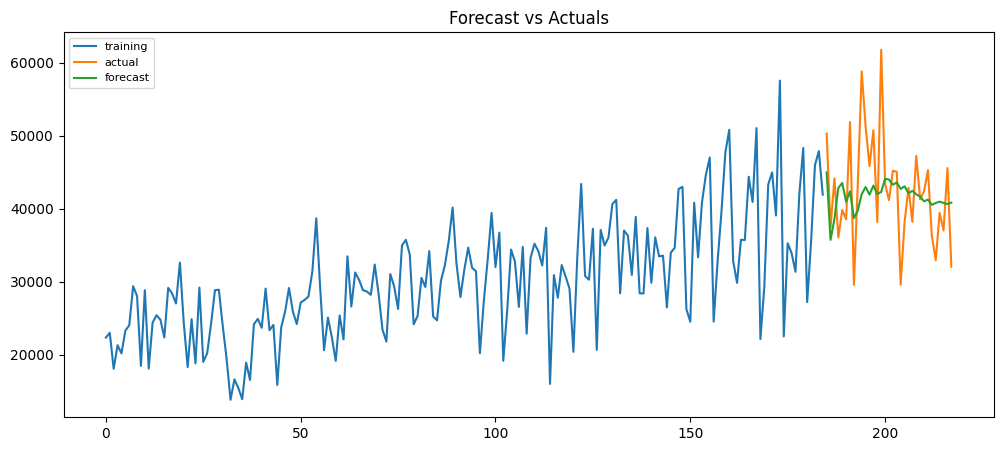

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  6983.782786244692
MAPE:  12.975434522291273


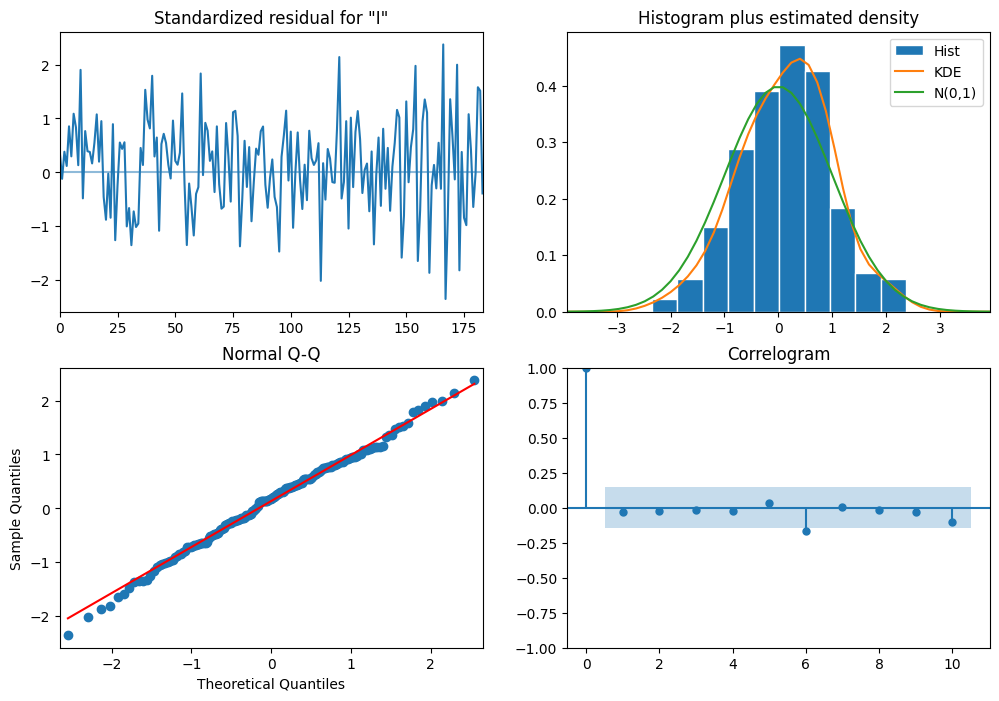

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9949504137039185 0.7894153594970703


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.4183155567959354, 0.6757164169487551)

**SARIMAX (4,1,0)(1,0,0)[6] -  Tidak Memenuhi**

In [ ]:
# Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek', 'Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(4,1,0), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      ImporHS04Ton   No. Observations:                  185
Model:             SARIMAX(4, 1, 0)x(1, 0, 0, 6)   Log Likelihood               -1870.271
Date:                           Sun, 12 May 2024   AIC                           3756.542
Time:                                   05:07:56   BIC                           3782.262
Sample:                                        0   HQIC                          3766.967
                                           - 185                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3218.7783   1024.514     -3.142      0.002   -5226.788   -1210.768
Inflasi(%)   915.5785    411.840      2.223

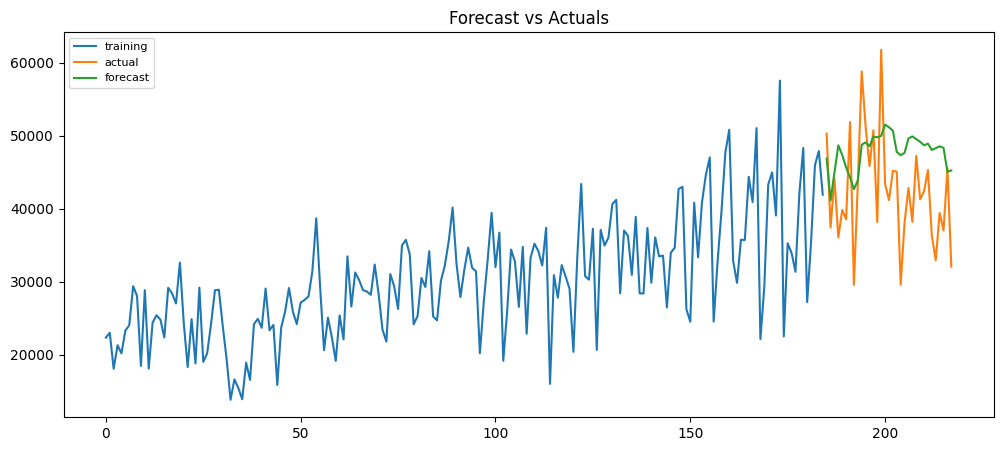

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek', 'Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  8856.089361108347
MAPE:  19.528740236996388


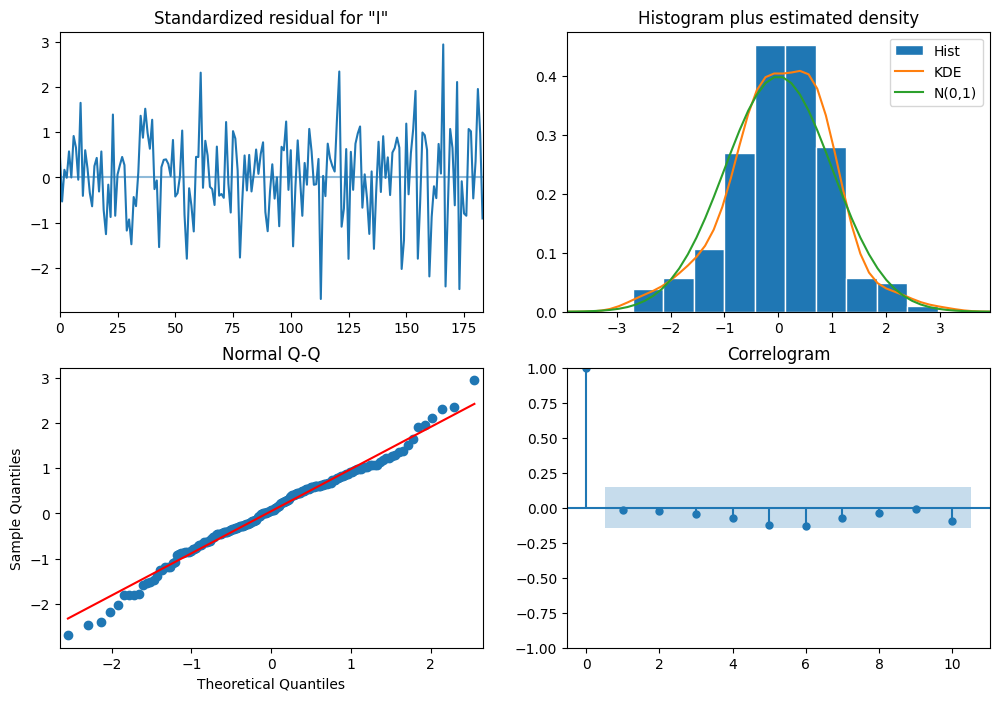

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9890751838684082 0.16746510565280914


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.08374601572086965, 0.9332583703668131)

**SARIMAX (4,1,1)(1,0,0)[6] -  Tidak Memenuhi**

In [ ]:
# Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek', 'Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(4,1,1), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       ImporHS04Ton   No. Observations:                  185
Model:             SARIMAX(4, 1, 1)x(1, 0, [], 6)   Log Likelihood               -1865.121
Date:                            Sun, 12 May 2024   AIC                           3748.241
Time:                                    05:11:17   BIC                           3777.176
Sample:                                         0   HQIC                          3759.969
                                            - 185                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3218.7767   1277.557     -2.519      0.012   -5722.742    -714.811
Inflasi(%)   915.5710    391.500   

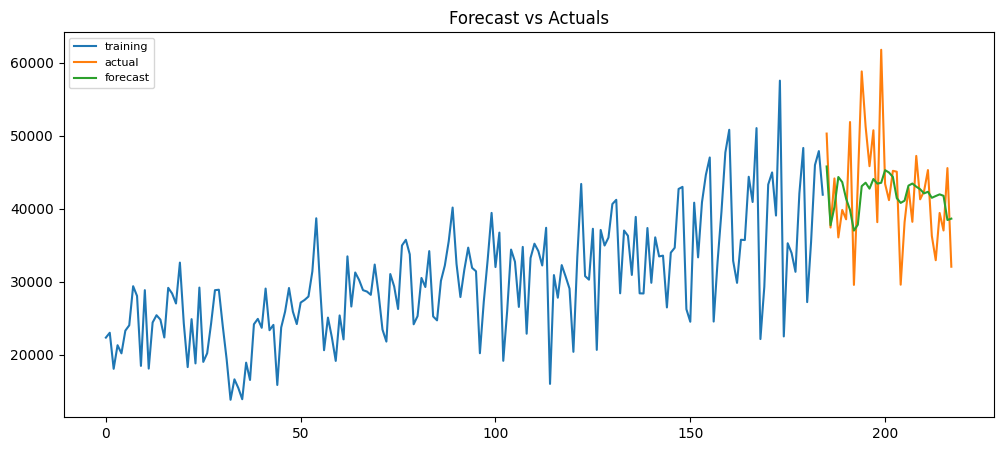

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek', 'Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  6816.288791525652
MAPE:  12.876962743429432


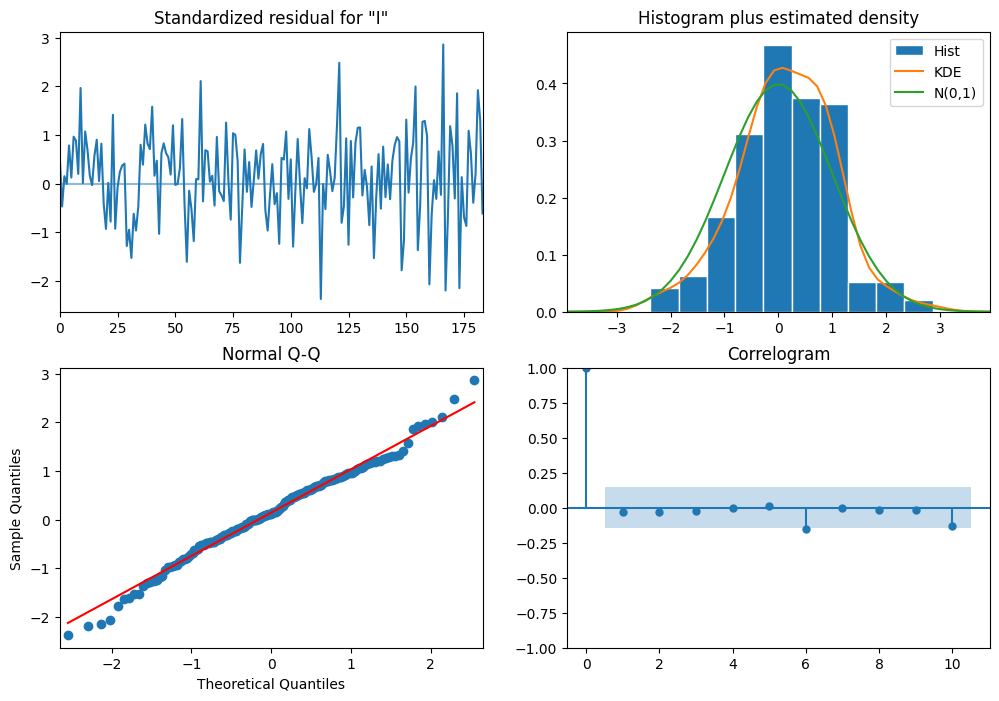

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9919127821922302 0.3916645646095276


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.3690196729685172, 0.7121130611465464)

**SARIMAX (5,1,0)(1,0,0)[6] -  Tidak Memenuhi**

In [ ]:
# Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek', 'Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(5,1,0), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      ImporHS04Ton   No. Observations:                  185
Model:             SARIMAX(5, 1, 0)x(1, 0, 0, 6)   Log Likelihood               -1860.954
Date:                           Sun, 12 May 2024   AIC                           3739.908
Time:                                   08:02:43   BIC                           3768.842
Sample:                                        0   HQIC                          3751.635
                                           - 185                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3218.7781   1165.260     -2.762      0.006   -5502.646    -934.910
Inflasi(%)   915.5763    201.300      4.548

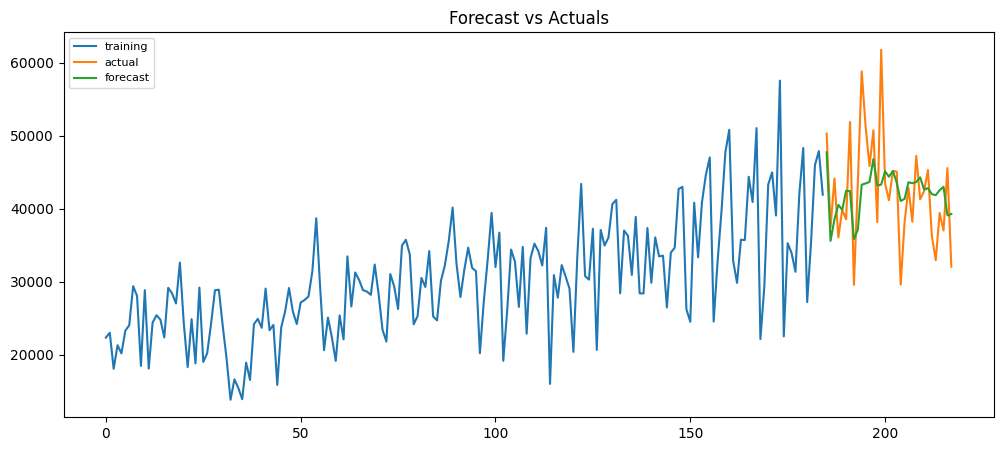

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek', 'Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  6521.250455476407
MAPE:  12.103693833040358


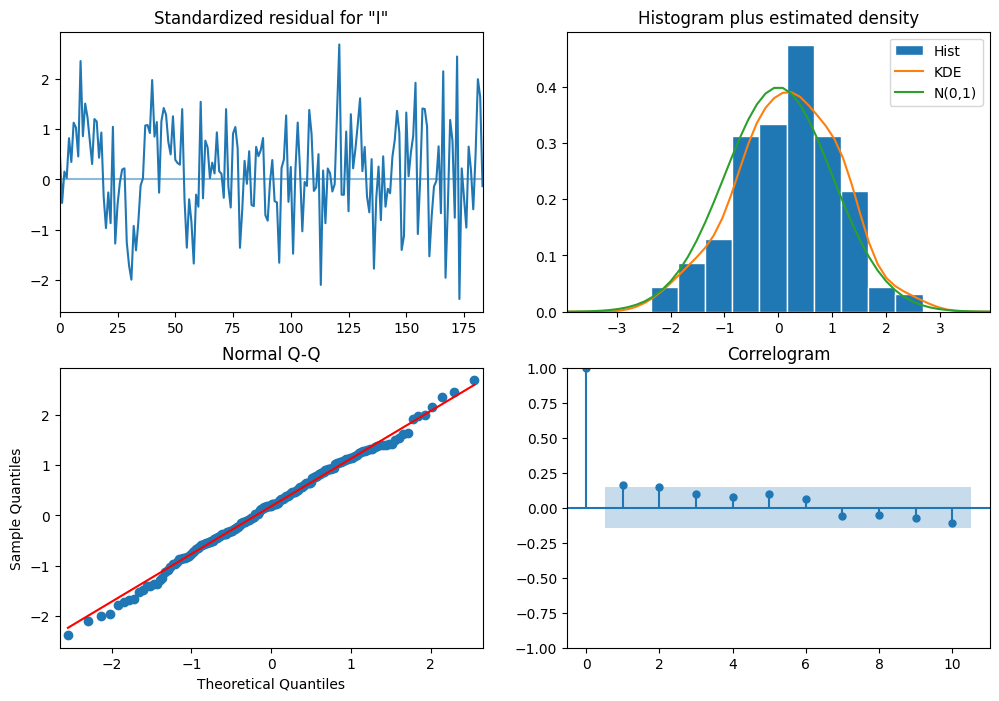

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.994933009147644 0.7871324419975281


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(-1.9874348088913887, 0.04687423347609463)

**SARIMAX (5,1,1)(1,0,0)[6] -  Tidak Memenuhi**

In [ ]:
# Overfitting Parameter
endog = train_data['ImporHS04Ton']
exog = train_data[['Eks_Imlek', 'Inflasi(%)']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(5,1,1), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       ImporHS04Ton   No. Observations:                  185
Model:             SARIMAX(5, 1, 1)x(1, 0, [], 6)   Log Likelihood               -1863.389
Date:                            Sun, 12 May 2024   AIC                           3746.778
Time:                                    08:11:56   BIC                           3778.927
Sample:                                         0   HQIC                          3759.808
                                            - 185                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek  -3218.7769   1096.018     -2.937      0.003   -5366.932   -1070.622
Inflasi(%)   915.5706    336.249   

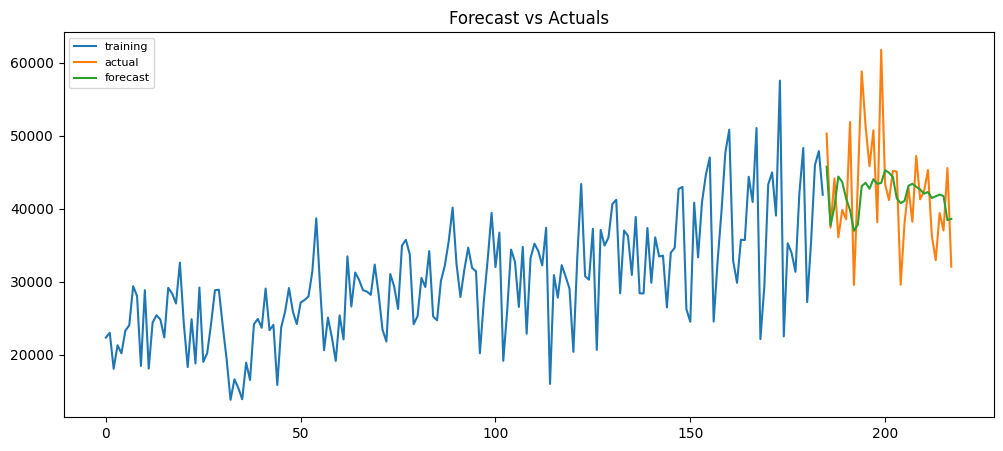

In [ ]:
#Plot Forecasting
forecast_steps = 33
fc = fitted_model.forecast(steps=forecast_steps, exog=test_data[['Eks_Imlek', 'Inflasi(%)']])

plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='training')
plt.plot(test_data.ImporHS04Ton, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  6815.27091329923
MAPE:  12.862509647495482


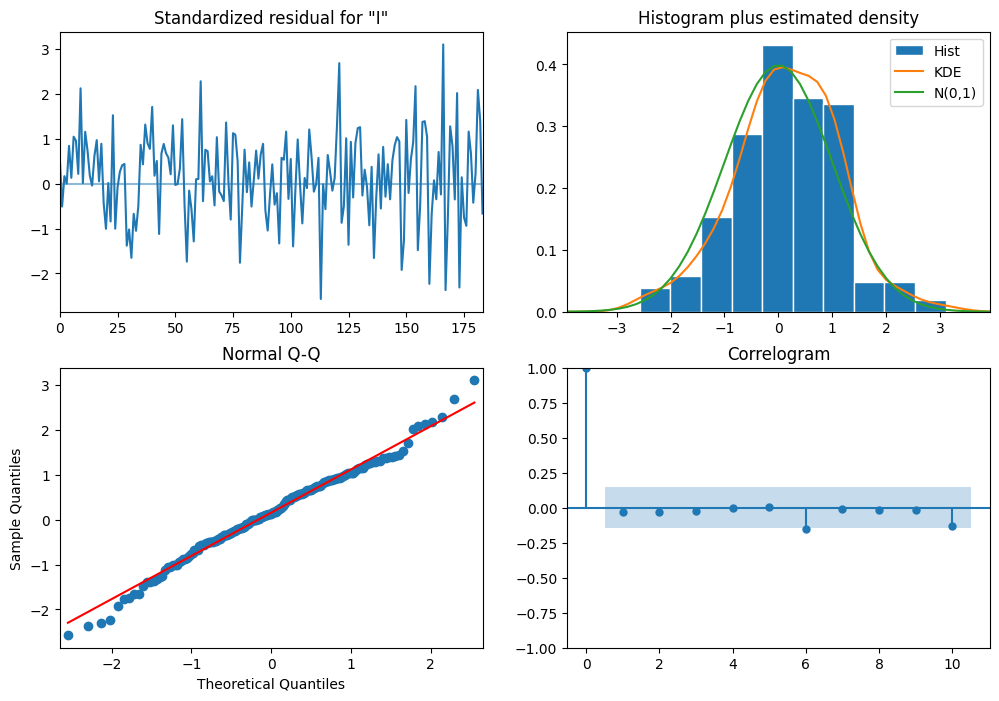

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.9919549226760864 0.39627543091773987


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(0.3690196729685172, 0.7121130611465464)

## **SARIMAX MODEL (TRANSFORMASI)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import t
from statsmodels.tsa.stattools import adfuller
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from PythonTsa.plot_acf_pacf import acf_pacf_fig
import statsmodels.tsa.api as smt
from scipy.stats import boxcox

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_hs04 = pd.read_csv('HS04.csv')
start_date = "2006-01-01"
end_date = "2024-02-28"
date_range = pd.date_range(start=start_date, end=end_date, freq="M")
print(df_hs04)

    Tanggal  ImporHS04Ton  Eks_IdulFitri  Eks_IdulAdha  Eks_Imlek  Eks_Natal  \
0     6-Jan         22321              0             0          1          1   
1     6-Feb         22988              0             0          1          0   
2     6-Mar         18043              0             0          0          0   
3     6-Apr         21278              0             0          0          0   
4     6-May         20163              0             0          0          0   
..      ...           ...            ...           ...        ...        ...   
213  23-Oct         32940              0             0          0          0   
214  23-Nov         39418              0             0          0          1   
215  23-Dec         37017              0             0          0          1   
216  24-Jan         45576              0             0          1          1   
217  24-Feb         32046              0             0          1          0   

     Inflasi(%)  USDtoRP  
0         17

In [ ]:
train_size = int(len(df_hs04) * 0.85)
train_data = df_hs04.iloc[:train_size]
test_data = df_hs04.iloc[train_size:]

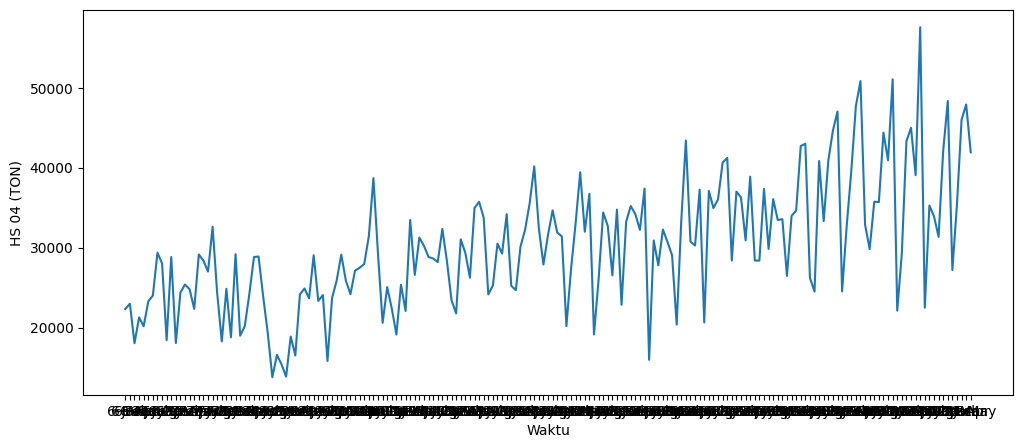

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(train_data.Tanggal, train_data.ImporHS04Ton)
plt.xlabel('Waktu'), plt.ylabel('HS 04 (TON)')
plt.show()

In [ ]:
#Box-Cox transformation
data, lambda_fit = boxcox(train_data.ImporHS04Ton)
train_data['ImporHS04Ton_BoxCox'] = data

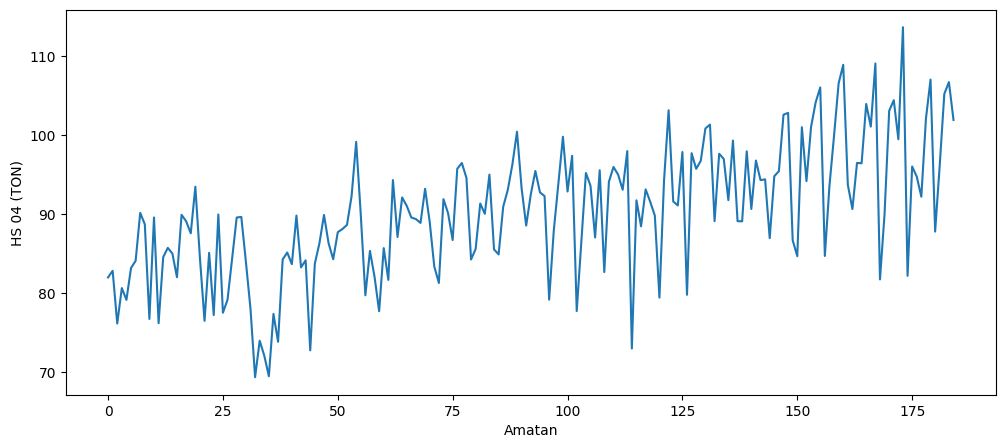

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(train_data['ImporHS04Ton_BoxCox'])
plt.xlabel('Amatan'), plt.ylabel('HS 04 (TON)')
plt.show()

<Figure size 1000x800 with 0 Axes>

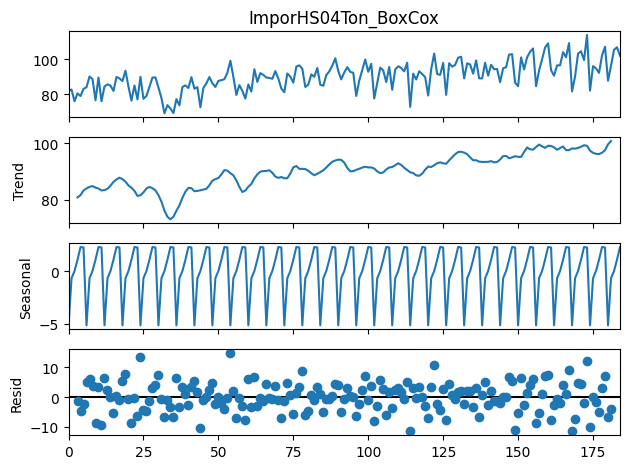

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(train_data['ImporHS04Ton_BoxCox'], model='additive', period=6)
plt.figure(figsize=(10,8), facecolor='white')
result_mul.plot()
plt.show()

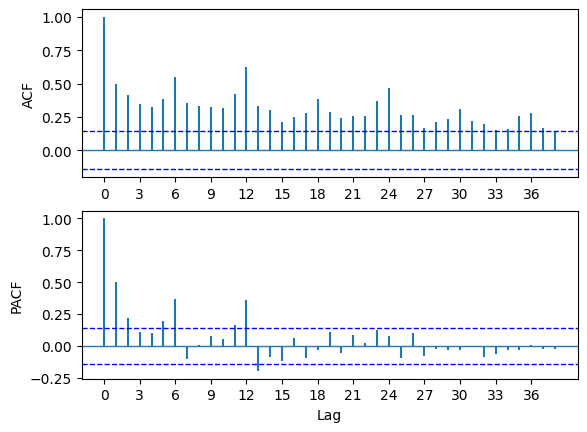

In [ ]:
acf_pacf_fig(train_data['ImporHS04Ton_BoxCox'],both=True,lag=38);plt.show()

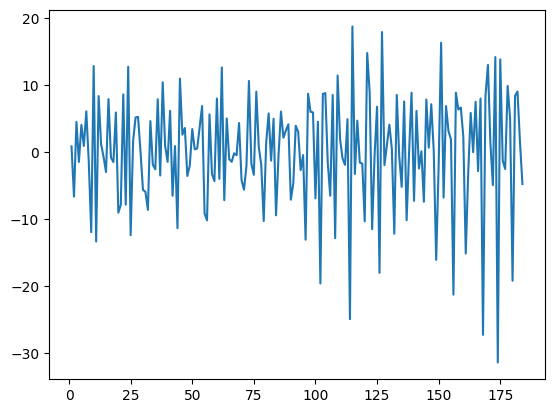

In [ ]:
d1 = train_data['ImporHS04Ton_BoxCox'].diff().dropna()
plt.plot(d1)

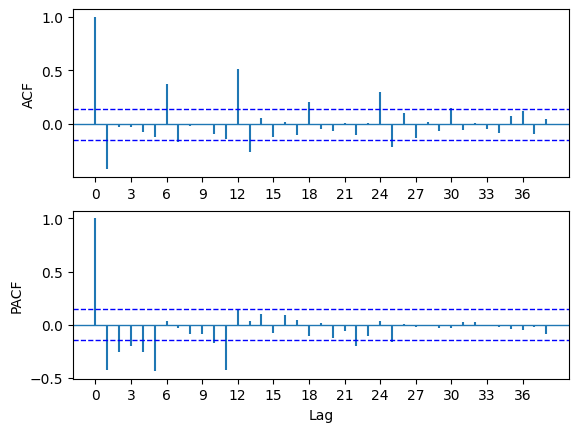

In [ ]:
acf_pacf_fig(d1,both=True,lag=38);plt.show()

In [ ]:
adf_d1 = adfuller(d1,autolag='AIC')[1]
print(adf_d1)

1.3032590679867695e-08


In [ ]:
from pmdarima import auto_arima

exog_vars = train_data[['Eks_IdulFitri', 'Eks_IdulAdha', 'Eks_Imlek', 'Eks_Natal', 'Inflasi(%)','USDtoRP']]
model = auto_arima(train_data['ImporHS04Ton_BoxCox'], exogenous=exog_vars,
                   start_p=0, start_q=0,start_P=0, start_Q=0, m=6, with_intercept= True, d=1,
                   max_P=4,
                   seasonal=True, stepwise=True, trace=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[6] intercept   : AIC=1304.683, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[6] intercept   : AIC=1241.087, Time=0.70 sec
 ARIMA(0,1,1)(0,0,1)[6] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[6]             : AIC=1302.714, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[6] intercept   : AIC=1270.515, Time=0.23 sec
 ARIMA(1,1,0)(2,0,0)[6] intercept   : AIC=1189.370, Time=0.63 sec
 ARIMA(1,1,0)(3,0,0)[6] intercept   : AIC=1190.922, Time=1.41 sec
 ARIMA(1,1,0)(2,0,1)[6] intercept   : AIC=1190.845, Time=0.87 sec
 ARIMA(1,1,0)(1,0,1)[6] intercept   : AIC=1211.764, Time=0.80 sec
 ARIMA(1,1,0)(3,0,1)[6] intercept   : AIC=1192.794, Time=2.84 sec
 ARIMA(0,1,0)(2,0,0)[6] intercept   : AIC=1228.927, Time=0.96 sec
 ARIMA(2,1,0)(2,0,0)[6] intercept   : AIC=1178.706, Time=1.92 sec
 ARIMA(2,1,0)(1,0,0)[6] intercept   : AIC=1233.893, Time=0.86 sec
 ARIMA(2,1,0)(3,0,0)[6] intercept   : AIC=1180.289, Time=1.51 sec
 ARIMA(2,1,0)(2,0,1)[6] intercept   : 

In [ ]:
# Overfitting Parameter
endog = train_data['ImporHS04Ton_BoxCox']
exog = train_data[['Eks_Imlek']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(0,1,1), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                ImporHS04Ton_BoxCox   No. Observations:                  185
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 6)   Log Likelihood                -595.897
Date:                            Thu, 30 May 2024   AIC                           1199.794
Time:                                    15:38:36   BIC                           1212.653
Sample:                                         0   HQIC                          1205.006
                                            - 185                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek     -2.0208      0.871     -2.320      0.020      -3.728      -0.314
ma.L1         -0.9102      0.030   

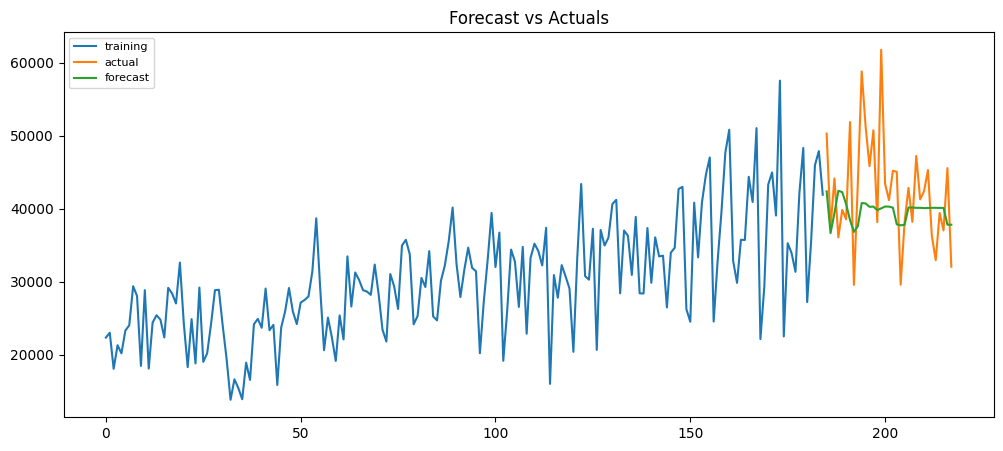

In [ ]:
#Forecasting
forecast_steps = 33
exog_test = test_data[['Eks_Imlek']]
fc_boxcox = fitted_model.forecast(steps=forecast_steps, exog=exog_test)

#Inverse Box-Cox transformation
from scipy.special import inv_boxcox
fc = inv_boxcox(fc_boxcox, lambda_fit)

#Plotting Forecast
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.index, train_data.ImporHS04Ton, label='training')
plt.plot(test_data.index, test_data.ImporHS04Ton, label='actual')
plt.plot( fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Hitung RMSE
rmse = sqrt(mean_squared_error(test_data.ImporHS04Ton, fc))
print('RMSE: ', rmse)

#Hitung MAPE
mape = np.mean(np.abs((test_data.ImporHS04Ton - fc) / test_data.ImporHS04Ton)) * 100
print('MAPE: ', mape)

RMSE:  7547.892747566661
MAPE:  13.161442197610345


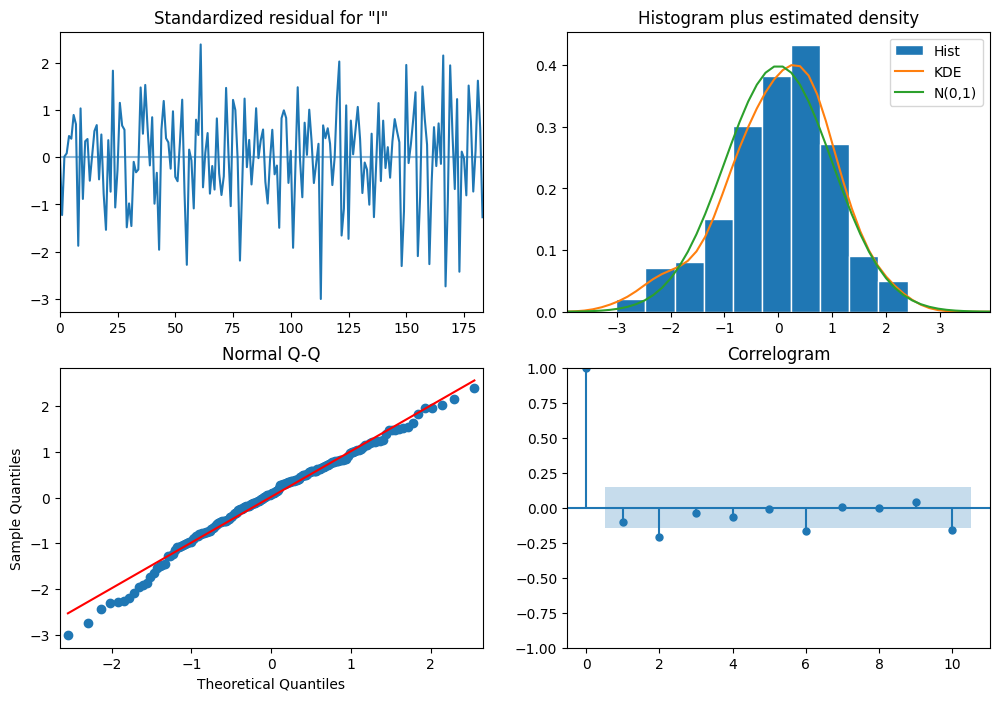

In [ ]:
#Asumsi Residual ARIMA
fitted_model.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

In [ ]:
#Uji Normalitas Sisaan
from scipy.stats import shapiro
stat,p = shapiro(fitted_model.resid)
print(stat,p)

0.7418288588523865 1.0867049563212939e-16


In [ ]:
#Uji Kebebasan Sisaan
from statsmodels.sandbox.stats.runs import runstest_1samp
runstest_1samp(fitted_model.resid, correction=False)

(1.5521602779428538, 0.12062387793405203)

In [ ]:
fitted_model.test_heteroskedasticity('breakvar')

array([[1.52373075, 0.10268067]])

## **Long Short Term-Memory**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from pandas import read_csv
from pandas import DataFrame

In [ ]:
np.random.seed(6)

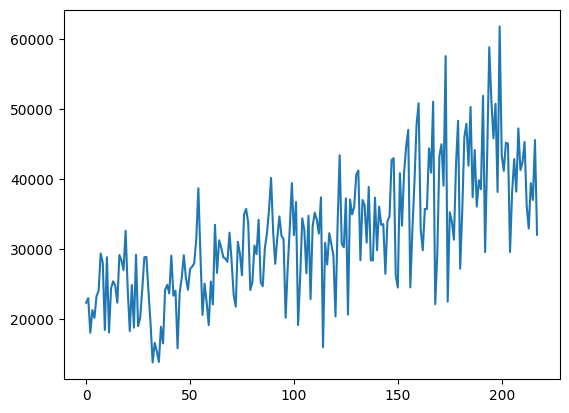

In [ ]:
dataframe = pd.read_csv('HS04.csv', engine='python')
dataframe = dataframe.iloc[:, [1]]
dataset = dataframe.values.astype('float32')
plt.plot(dataset)

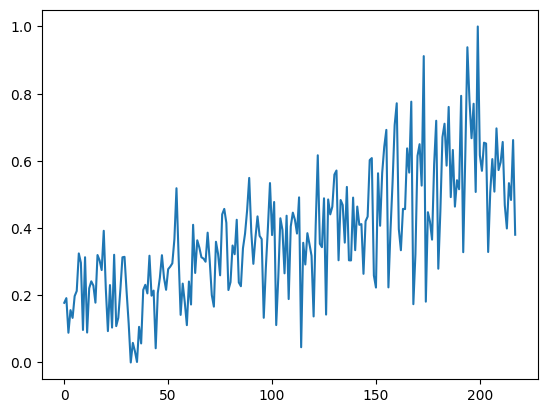

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
plt.plot(dataset)

In [ ]:
train_size = int(len(dataset)*0.85)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# Supervised Learning
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# Mendefinisikan fungsi untuk lstm model
def create_model(learning_rate=0.0001, look_back=1, units=200):
    model = Sequential()
    model.add(LSTM(units, input_shape=(1, look_back)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model
# Membentuk model dengan KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=2)

<ipython-input-27-694abdfa3806>:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=2)


In [ ]:
# Hyperparameter tuning
param_grid = {'batch_size': [1, 64],
'epochs': [1, 150],
'learning_rate': [0.0001]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=15)
grid_result = grid.fit(trainX, trainY)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
results = grid_result.cv_results_
for mean_score, std_score, params in zip(results['mean_test_score'],
results['std_test_score'], results['params']):
    print("Hyperparameters:", params)
    print("Mean Score:", mean_score)
    print("Standard Deviation:", std_score)
    print()

171/171 - 7s - loss: 0.1094 - 7s/epoch - 38ms/step
13/13 - 1s - loss: 0.0152 - 935ms/epoch - 72ms/step
171/171 - 6s - loss: 0.1176 - 6s/epoch - 34ms/step
13/13 - 1s - loss: 0.0236 - 1s/epoch - 88ms/step
171/171 - 2s - loss: 0.1138 - 2s/epoch - 12ms/step
13/13 - 1s - loss: 0.0122 - 538ms/epoch - 41ms/step
171/171 - 2s - loss: 0.1148 - 2s/epoch - 13ms/step
13/13 - 1s - loss: 0.0233 - 512ms/epoch - 39ms/step
172/172 - 3s - loss: 0.1114 - 3s/epoch - 18ms/step
12/12 - 0s - loss: 0.0424 - 494ms/epoch - 41ms/step
172/172 - 2s - loss: 0.1126 - 2s/epoch - 12ms/step
12/12 - 0s - loss: 0.0454 - 490ms/epoch - 41ms/step
172/172 - 3s - loss: 0.1203 - 3s/epoch - 20ms/step
12/12 - 1s - loss: 0.0653 - 577ms/epoch - 48ms/step
172/172 - 3s - loss: 0.1189 - 3s/epoch - 17ms/step
12/12 - 1s - loss: 0.0886 - 838ms/epoch - 70ms/step
172/172 - 2s - loss: 0.1098 - 2s/epoch - 12ms/step
12/12 - 1s - loss: 0.0701 - 506ms/epoch - 42ms/step
172/172 - 2s - loss: 0.1066 - 2s/epoch - 12ms/step
12/12 - 0s - loss: 0.0702

3/3 - 2s - loss: 0.1485 - 2s/epoch - 698ms/step
1/1 - 0s - loss: 0.0593 - 493ms/epoch - 493ms/step


3/3 - 3s - loss: 0.1472 - 3s/epoch - 1s/step
1/1 - 1s - loss: 0.0888 - 531ms/epoch - 531ms/step
3/3 - 4s - loss: 0.1443 - 4s/epoch - 1s/step
1/1 - 1s - loss: 0.0970 - 568ms/epoch - 568ms/step
3/3 - 2s - loss: 0.1387 - 2s/epoch - 730ms/step
1/1 - 1s - loss: 0.1145 - 508ms/epoch - 508ms/step
3/3 - 3s - loss: 0.1255 - 3s/epoch - 844ms/step
1/1 - 1s - loss: 0.1299 - 747ms/epoch - 747ms/step
3/3 - 2s - loss: 0.1440 - 2s/epoch - 714ms/step
1/1 - 0s - loss: 0.1338 - 493ms/epoch - 493ms/step
3/3 - 3s - loss: 0.1425 - 3s/epoch - 853ms/step
1/1 - 1s - loss: 0.1330 - 764ms/epoch - 764ms/step
3/3 - 4s - loss: 0.1442 - 4s/epoch - 1s/step
1/1 - 1s - loss: 0.2119 - 918ms/epoch - 918ms/step
3/3 - 2s - loss: 0.1443 - 2s/epoch - 734ms/step
1/1 - 1s - loss: 0.1906 - 543ms/epoch - 543ms/step
3/3 - 2s - loss: 0.1410 - 2s/epoch - 700ms/step
1/1 - 1s - loss: 0.2941 - 516ms/epoch - 516ms/step
3/3 - 2s - loss: 0.1311 - 2s/epoch - 685ms/step
1/1 - 1s - loss: 0.2573 - 522ms/epoch - 522ms/step
3/3 - 3s - loss: 0.

In [ ]:
# Membangun dan melatih kembali model dengan hyperparameter terbaik
best_lr = grid_result.best_params_['learning_rate']
best_bs = grid_result.best_params_['batch_size']
best_ep = grid_result.best_params_['epochs']
best_units = 175
best_model = create_model(learning_rate=best_lr, units=best_units)
history = best_model.fit(trainX, trainY, epochs=best_ep, batch_size=best_bs,
verbose=2)

Epoch 1/150
184/184 - 2s - loss: 0.1072 - 2s/epoch - 11ms/step
Epoch 2/150
184/184 - 1s - loss: 0.0555 - 506ms/epoch - 3ms/step
Epoch 3/150
184/184 - 1s - loss: 0.0305 - 682ms/epoch - 4ms/step
Epoch 4/150
184/184 - 1s - loss: 0.0237 - 854ms/epoch - 5ms/step
Epoch 5/150
184/184 - 1s - loss: 0.0226 - 878ms/epoch - 5ms/step
Epoch 6/150
184/184 - 1s - loss: 0.0224 - 912ms/epoch - 5ms/step
Epoch 7/150
184/184 - 1s - loss: 0.0223 - 658ms/epoch - 4ms/step
Epoch 8/150
184/184 - 1s - loss: 0.0222 - 530ms/epoch - 3ms/step
Epoch 9/150
184/184 - 1s - loss: 0.0222 - 517ms/epoch - 3ms/step
Epoch 10/150
184/184 - 1s - loss: 0.0221 - 525ms/epoch - 3ms/step
Epoch 11/150
184/184 - 1s - loss: 0.0220 - 531ms/epoch - 3ms/step
Epoch 12/150
184/184 - 1s - loss: 0.0219 - 512ms/epoch - 3ms/step
Epoch 13/150
184/184 - 1s - loss: 0.0219 - 517ms/epoch - 3ms/step
Epoch 14/150
184/184 - 1s - loss: 0.0219 - 525ms/epoch - 3ms/step
Epoch 15/150
184/184 - 1s - loss: 0.0218 - 508ms/epoch - 3ms/step
Epoch 16/150
184/184 

In [ ]:
# Prediksi data uji
predictions = []
for i in range(len(testX)):
    X = testX[i]
    X = np.reshape(X, (1, 1, look_back))
    yhat = best_model.predict(X)
    yhat = scaler.inverse_transform(yhat)
    predictions.append(yhat)

for i in range(len(predictions)):
    expected = scaler.inverse_transform(testY[i].reshape(-1, 1))
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, predictions[i], expected))

1/1 [==============================] - 0s 28ms/step
Month=1, Predicted=39506.796875, Expected=37421.000000
Month=2, Predicted=33267.238281, Expected=44156.000000
Month=3, Predicted=36521.914062, Expected=36065.000000
Month=4, Predicted=32613.650391, Expected=39836.000000
Month=5, Predicted=34432.710938, Expected=38549.000000
Month=6, Predicted=33811.375000, Expected=51895.000000
Month=7, Predicted=40277.054688, Expected=29552.000000
Month=8, Predicted=29483.279297, Expected=43480.000000
Month=9, Predicted=36194.636719, Expected=58835.000000
Month=10, Predicted=43655.804688, Expected=51277.000000
Month=11, Predicted=39976.652344, Expected=45839.000000
Month=12, Predicted=37337.261719, Expected=50763.996094
Month=13, Predicted=39727.363281, Expected=38159.000000
Month=14, Predicted=33623.195312, Expected=61805.000000
Month=15, Predicted=45104.406250, Expected=43412.000000
Month=16, Predicted=36161.726562, Expected=41178.000000
Month=17, Predicted=35081.136719, Expected=45201.000000
Month

In [ ]:
# Prediksi data latih
predictions_train = []
for i in range(len(trainX)):
    X = trainX[i]
    X = np.reshape(X, (1, 1, look_back))
    yhat = best_model.predict(X)
    yhat = scaler.inverse_transform(yhat)
    predictions_train.append(yhat)

for i in range(len(predictions_train)):
    expected_train = scaler.inverse_transform(trainY[i].reshape(-1, 1))
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, predictions_train[i], expected_train))

1/1 [==============================] - 0s 33ms/step
Month=1, Predicted=26026.771484, Expected=22988.000000
Month=2, Predicted=26344.705078, Expected=18043.000000
Month=3, Predicted=23992.281250, Expected=21278.000000
Month=4, Predicted=25530.005859, Expected=20163.000000
Month=5, Predicted=24999.466797, Expected=23278.000000
Month=6, Predicted=26482.998047, Expected=24011.000000
Month=7, Predicted=26832.693359, Expected=29374.000000
Month=8, Predicted=29397.943359, Expected=28037.001953
Month=9, Predicted=28757.363281, Expected=18441.000000
Month=10, Predicted=24181.212891, Expected=28831.998047
Month=11, Predicted=29138.177734, Expected=18072.000000
Month=12, Predicted=24006.046875, Expected=24395.000000
Month=13, Predicted=27015.980469, Expected=25390.998047
Month=14, Predicted=27491.667969, Expected=24786.000000
Month=15, Predicted=27202.675781, Expected=22342.000000
Month=16, Predicted=26036.783203, Expected=29148.000000
Month=17, Predicted=29289.619141, Expected=28377.000000
Month

RMSE test: 10352.0621
MAPE test: 0.1837


<function matplotlib.pyplot.show(close=None, block=None)>

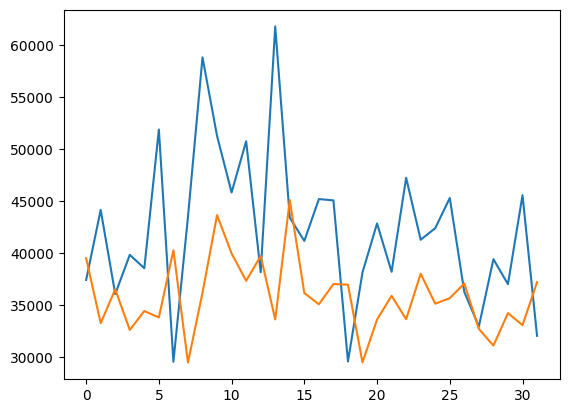

In [ ]:
predictions = np.array(predictions)
testY = np.array(testY)
testY = scaler.inverse_transform([testY])
testY = np.array(testY).reshape(-1, 1)
predictions= np.array(predictions).reshape(-1, 1)
rmse = np.sqrt(mean_squared_error(testY, predictions))
print('RMSE test: %.4f' % rmse)
mape = mean_absolute_percentage_error(testY, predictions)
print('MAPE test: %.4f' % mape)
plt.plot(testY)
plt.plot(predictions)
plt.show

RMSE test: 6985.4214
MAPE test: 0.1961


<function matplotlib.pyplot.show(close=None, block=None)>

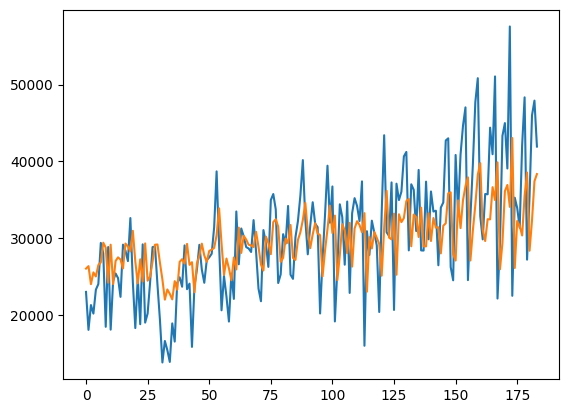

In [ ]:
predictions_train = np.array(predictions_train)
trainY = np.array(trainY)
trainY = scaler.inverse_transform([trainY])
trainY = np.array(trainY).reshape(-1, 1)
predictions_train = np.array(predictions_train).reshape(-1, 1)
rmse_train = np.sqrt(mean_squared_error(trainY, predictions_train))
print('RMSE test: %.4f' % rmse_train)
mape_train = mean_absolute_percentage_error(trainY, predictions_train)
print('MAPE test: %.4f' % mape_train)
plt.plot(trainY)
plt.plot(predictions_train)
plt.show

## **Peramalan**

In [ ]:
arimax_510 = ARIMA(df_hs04.ImporHS04Ton, order=(5, 1, 0)).fit()

In [ ]:
forecast_steps = 10
predict_510 = arimax_510.get_forecast(steps=forecast_steps).summary_frame(alpha=0.05)
predict_510

ImporHS04Ton          mean      mean_se  mean_ci_lower  mean_ci_upper
218           36206.730949  6218.898088   24017.914673   48395.547224
219           39581.890699  6418.532845   27001.797489   52161.983910
220           37764.669189  6425.160827   25171.585373   50357.753005
221           38850.154954  6477.539336   26154.411146   51545.898761
222           40369.848993  6478.148288   27672.911662   53066.786323
223           36547.892844  6501.241788   23805.693085   49290.092603
224           39076.645890  6829.784992   25690.513283   52462.778496
225           37635.983067  6879.337473   24152.729383   51119.236751
226           38498.256763  7040.725733   24698.687902   52297.825625
227           38139.351470  7096.457885   24230.549598   52048.153342

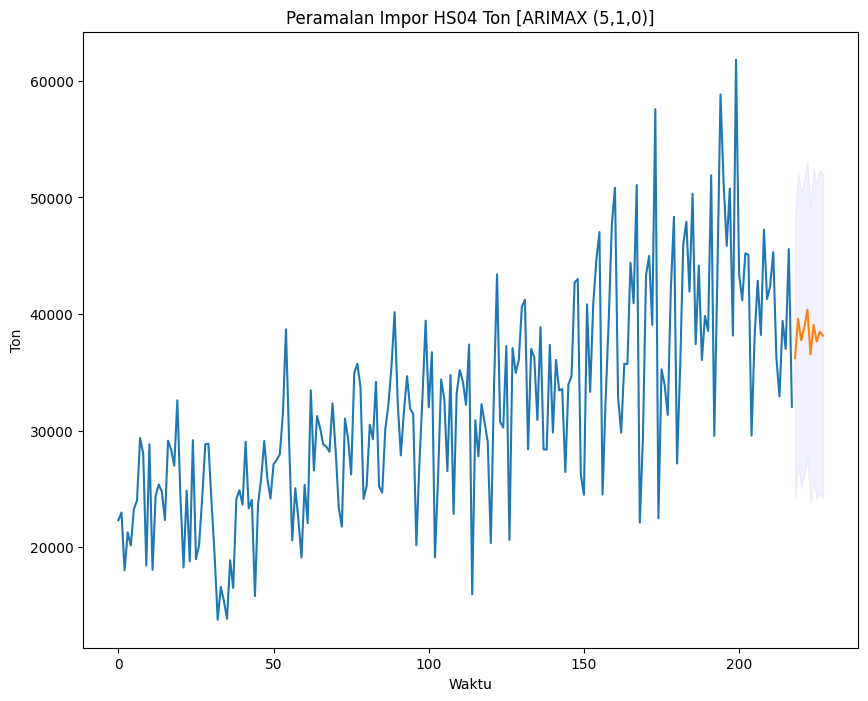

In [ ]:
# Plot hasil peramalan
plt.figure(figsize=(10, 8))
plt.plot(df_hs04.ImporHS04Ton)
plt.plot(predict_510['mean'])
plt.fill_between(predict_510.index, predict_510['mean_ci_lower'], predict_510['mean_ci_upper'], color='b', alpha=.05)
plt.title('Peramalan Impor HS04 Ton [ARIMAX (5,1,0)]')
plt.xlabel('Waktu')
plt.ylabel('Ton')
plt.show()

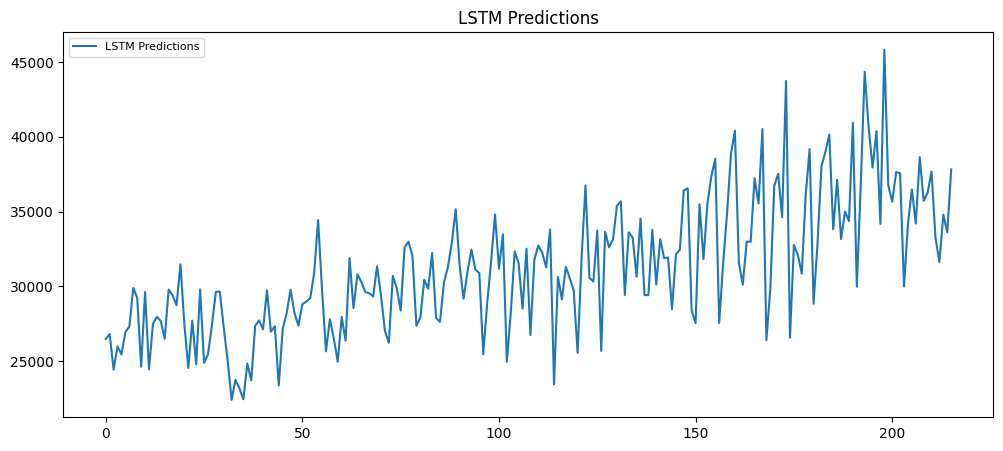

In [ ]:
lstm_predict = np.concatenate((predictions_train, predictions))
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(lstm_predict, label='LSTM Predictions')
plt.title('LSTM Predictions')
plt.legend(loc='upper left', fontsize=8)
plt.show()

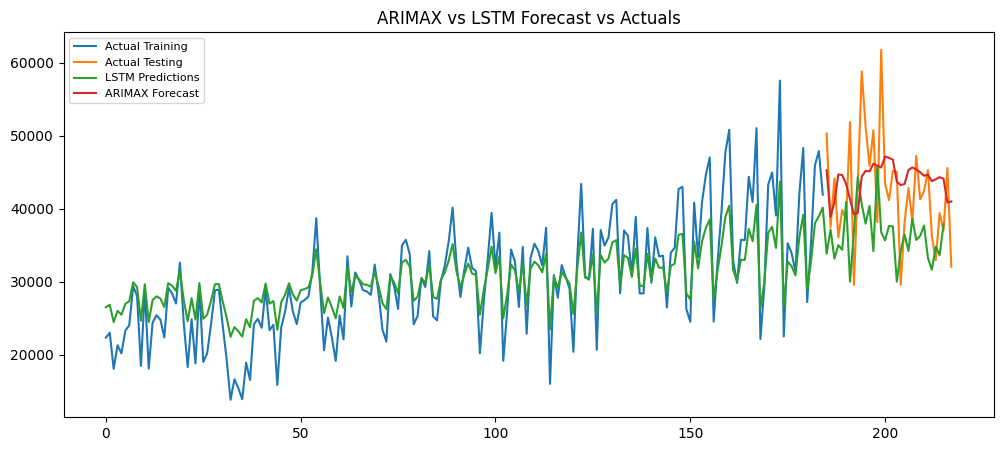

In [ ]:
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.ImporHS04Ton, label='Actual Training')
plt.plot(test_data.ImporHS04Ton, label='Actual Testing')
plt.plot(lstm_predict, label='LSTM Predictions')
plt.plot(fc, label='ARIMAX Forecast')
plt.title('ARIMAX vs LSTM Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Load data
df_hs04 = pd.read_csv('HS04.csv')
start_date = "2006-01-01"
end_date = "2024-02-28"
date_range = pd.date_range(start=start_date, end=end_date, freq="M")
print(df_hs04)

    Tanggal  ImporHS04Ton  Eks_IdulFitri  Eks_IdulAdha  Eks_Imlek  Eks_Natal  \
0     6-Jan         22321              0             0          1          1   
1     6-Feb         22988              0             0          1          0   
2     6-Mar         18043              0             0          0          0   
3     6-Apr         21278              0             0          0          0   
4     6-May         20163              0             0          0          0   
..      ...           ...            ...           ...        ...        ...   
213  23-Oct         32940              0             0          0          0   
214  23-Nov         39418              0             0          0          1   
215  23-Dec         37017              0             0          0          1   
216  24-Jan         45576              0             0          1          1   
217  24-Feb         32046              0             0          1          0   

     Inflasi(%)  USDtoRP  
0         17

In [ ]:
# Split data into train and test sets
train_size = int(len(df_hs04) * 0.85)
train_data = df_hs04.iloc[:train_size]
test_data = df_hs04.iloc[train_size:]

In [ ]:
# Box-Cox transformation
data, lambda_fit = boxcox(train_data.ImporHS04Ton)
train_data['ImporHS04Ton_BoxCox'] = data

In [ ]:
# Fit SARIMAX model
endog = train_data['ImporHS04Ton_BoxCox']
exog = train_data[['Eks_Imlek']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(0,1,1), seasonal_order=(1,0,0,6))
fitted_model = model.fit()
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                ImporHS04Ton_BoxCox   No. Observations:                  185
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 6)   Log Likelihood                -595.897
Date:                            Mon, 20 May 2024   AIC                           1199.794
Time:                                    04:03:10   BIC                           1212.653
Sample:                                         0   HQIC                          1205.006
                                            - 185                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Eks_Imlek     -2.0208      0.871     -2.320      0.020      -3.728      -0.314
ma.L1         -0.9102      0.030   

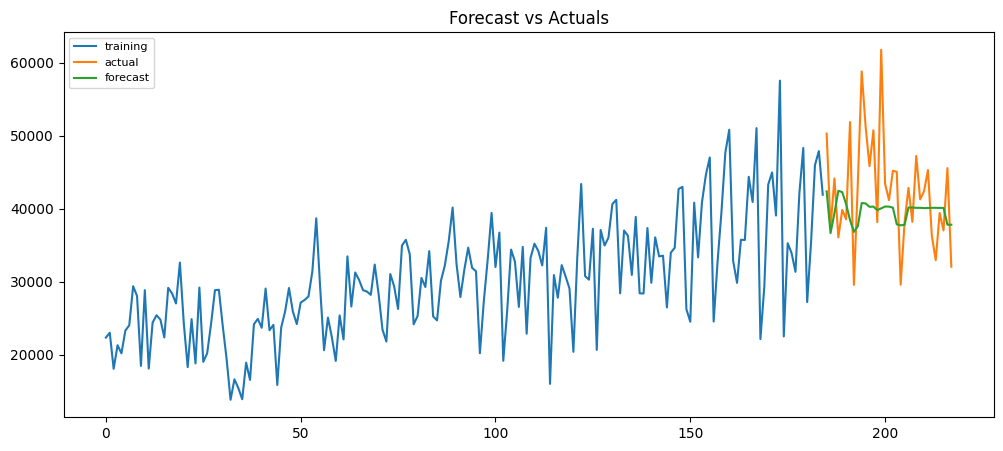

In [ ]:
# Forecasting
forecast_steps = 33
exog_test = test_data[['Eks_Imlek']]
fc_boxcox = fitted_model.forecast(steps=forecast_steps, exog=exog_test)

# Inverse Box-Cox transformation
fc = inv_boxcox(fc_boxcox, lambda_fit)

# Plotting results
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train_data.index, train_data.ImporHS04Ton, label='training')
plt.plot(test_data.index, test_data.ImporHS04Ton, label='actual')
plt.plot( fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()